# <center> 비디오 게임 데이터 분석 </center>  
<br>
<br>
<br>

###   **<center>AI_03_나승주</center>**

# -목차-
<br>

### 1. 장르 분석
1-1. 장르 선호도 전체적인 막대그래프 분석<br>
1-2. 장르 선호도 히트맵<br>
1-3. 장르 선호도 국가별 TOP3<br>
1-4. 연도별 게임 출고량의 따른 장르 트렌드<br>
1-5. 연도별 최고 판매량을 기록한 장르<br>
<br>

### 2. 플랫폼 분석
2-1. 플랫폼별 판매량 막대 그래프<br>
2-2. 플랫폼별 판매량 TOP3<br>
2-3. 년도별 출시량이 제일 많았던 플랫폼<br>
2-4. 년도별 최고 판매량을 기록했던 플랫폼<br>
<br>

### 3. 게임회사 분석
3-1. 게임회사별 판매량<br>
3-2. 년도별 최고 출시량을 기록한 회사<br>
3-3. 년도별 최고 판매량을 기록한 회사<br>

### 4. TOP10 게임 분석
4-1. 역대 판매량 TOP10 게임<br>
4-2. 최근 10년 판매량 TOP10 게임<br>
4-3. 최근 10년 TOP10 게임의 회사, 플랫폼, 장르의 판매량<br>
<br>
### 결론

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['font.family'] = 'NanumGothic'
plt.rc('axes', unicode_minus=False)
%config InlineBackend.figure_format = 'retina'

In [3]:
df = pd.read_csv('vgames_preprocessing_complete.csv', index_col=0)

## 전세계 판매량 추가

In [4]:
# 전세계 판매금액 컬럼 추가 하기
global_sales = []
for i in df.index:
    g_sales = df.loc[i, 'NA_Sales' : 'Other_Sales'].sum()
    global_sales.append(round(g_sales, 2))
df['Global_Sales'] = global_sales
df.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
6,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00,0.14
7,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0.00,0.00,0.03
8,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0.00,0.11,0.01,0.19
9,Imabikisou,PS3,2007.0,Adventure,Sega,0.00,0.00,0.04,0.00,0.04
10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0.00,0.01,0.08


### 년도 데이터 정수형으로 변환

In [5]:
# 년도에 수집하지 않은 데이터가 있어서 다시 수집 후 to_csv로 출력하고 다시 불러옴
df = pd.read_csv('vgames_+global_sales.csv', index_col=0)
# 년도 정수형으로 변환
df['Year'] = df['Year'].astype(int)
df.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
6,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00,0.14
7,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0.00,0.00,0.03
8,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,0.07,0.00,0.11,0.01,0.19
9,Imabikisou,PS3,2007,Adventure,Sega,0.00,0.00,0.04,0.00,0.04
10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.00,0.01,0.08


# 1. 장르 분석

In [6]:
temp_genre = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
temp_genre.columns = ['장르', '미국 판매량', '유럽 판매량', '일본 판매량', '나머지 국가 판매량']
temp_grouped = temp_genre.groupby(['장르']).sum()
temp_table = temp_grouped.reset_index()
# comp_melted = pd.melt(comp_table, id_vars=['Genre'],
#                      value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
#                      var_name='Sale_Area', value_name='Sale_Price')
temp_table.columns = ['장르', '미국 판매량', '유럽 판매량', '일본 판매량', '나머지 국가 판매량']
temp_table.head()

,장르,미국 판매량,유럽 판매량,일본 판매량,나머지 국가 판매량
0,Action,874.97,522.26,157.90,187.04
1,Adventure,106.11,64.97,52.10,16.93
2,Fighting,224.58,101.80,88.44,36.82
3,Misc,410.63,215.98,108.25,74.79
4,Platform,447.40,202.15,130.77,51.81


## 1-1. 장르 선호도 전체적인 막대그래프 분석

In [9]:
temp_melted.head()

,장르,판매국가,판매량
0,Action,미국 판매량,874.97
1,Adventure,미국 판매량,106.11
2,Fighting,미국 판매량,224.58
3,Misc,미국 판매량,410.63
4,Platform,미국 판매량,447.40


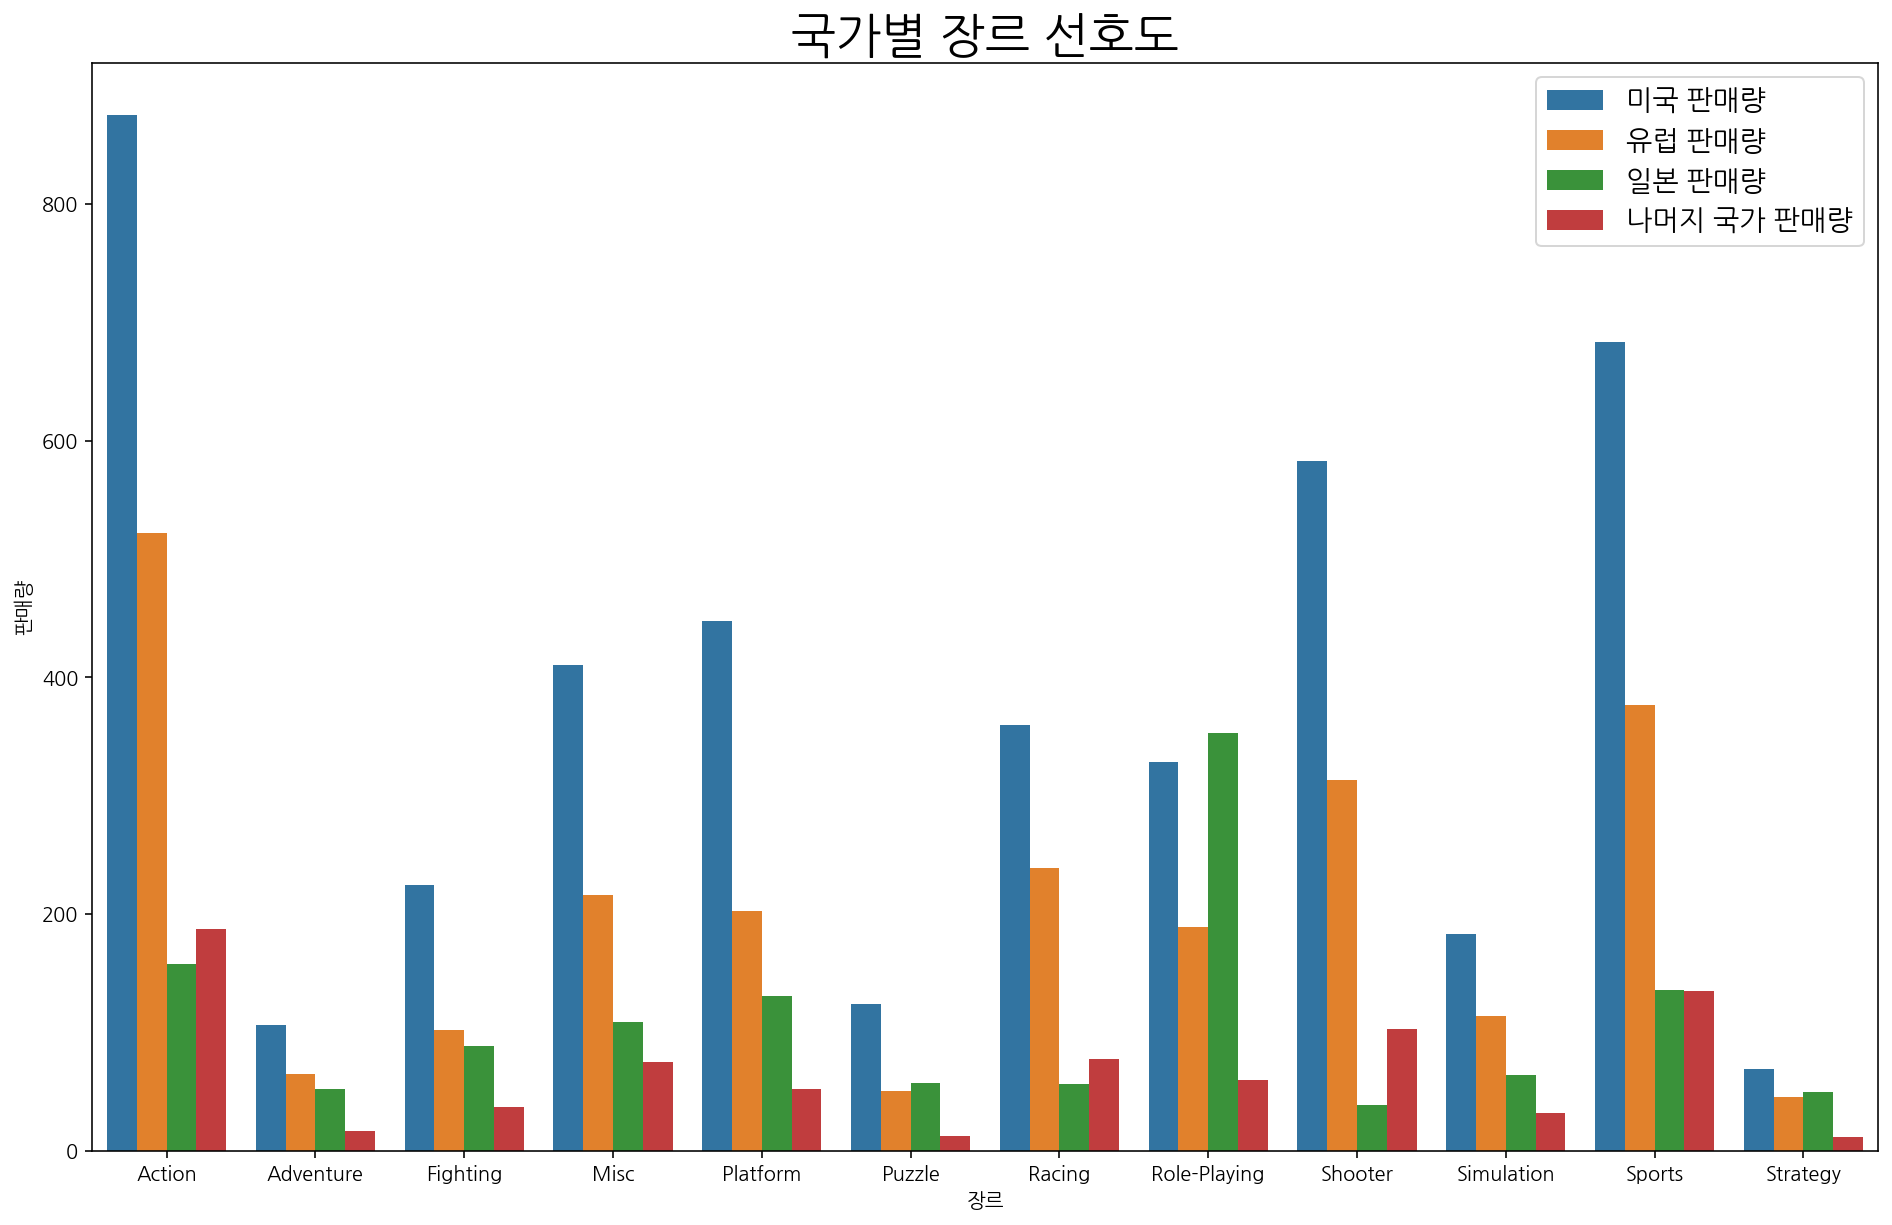

In [8]:
temp_melted = pd.melt(temp_table, id_vars=['장르'], value_vars=temp_table.columns[1:],
                      var_name='판매국가', value_name='판매량')
plt.figure(figsize=(16, 10))
sns.barplot(data=temp_melted, x='장르', y='판매량', hue='판매국가')
plt.title('국가별 장르 선호도', loc='center', fontsize=24)
plt.legend(fontsize=14)
plt.show()

## 1-2. 장르 선호도 히트맵

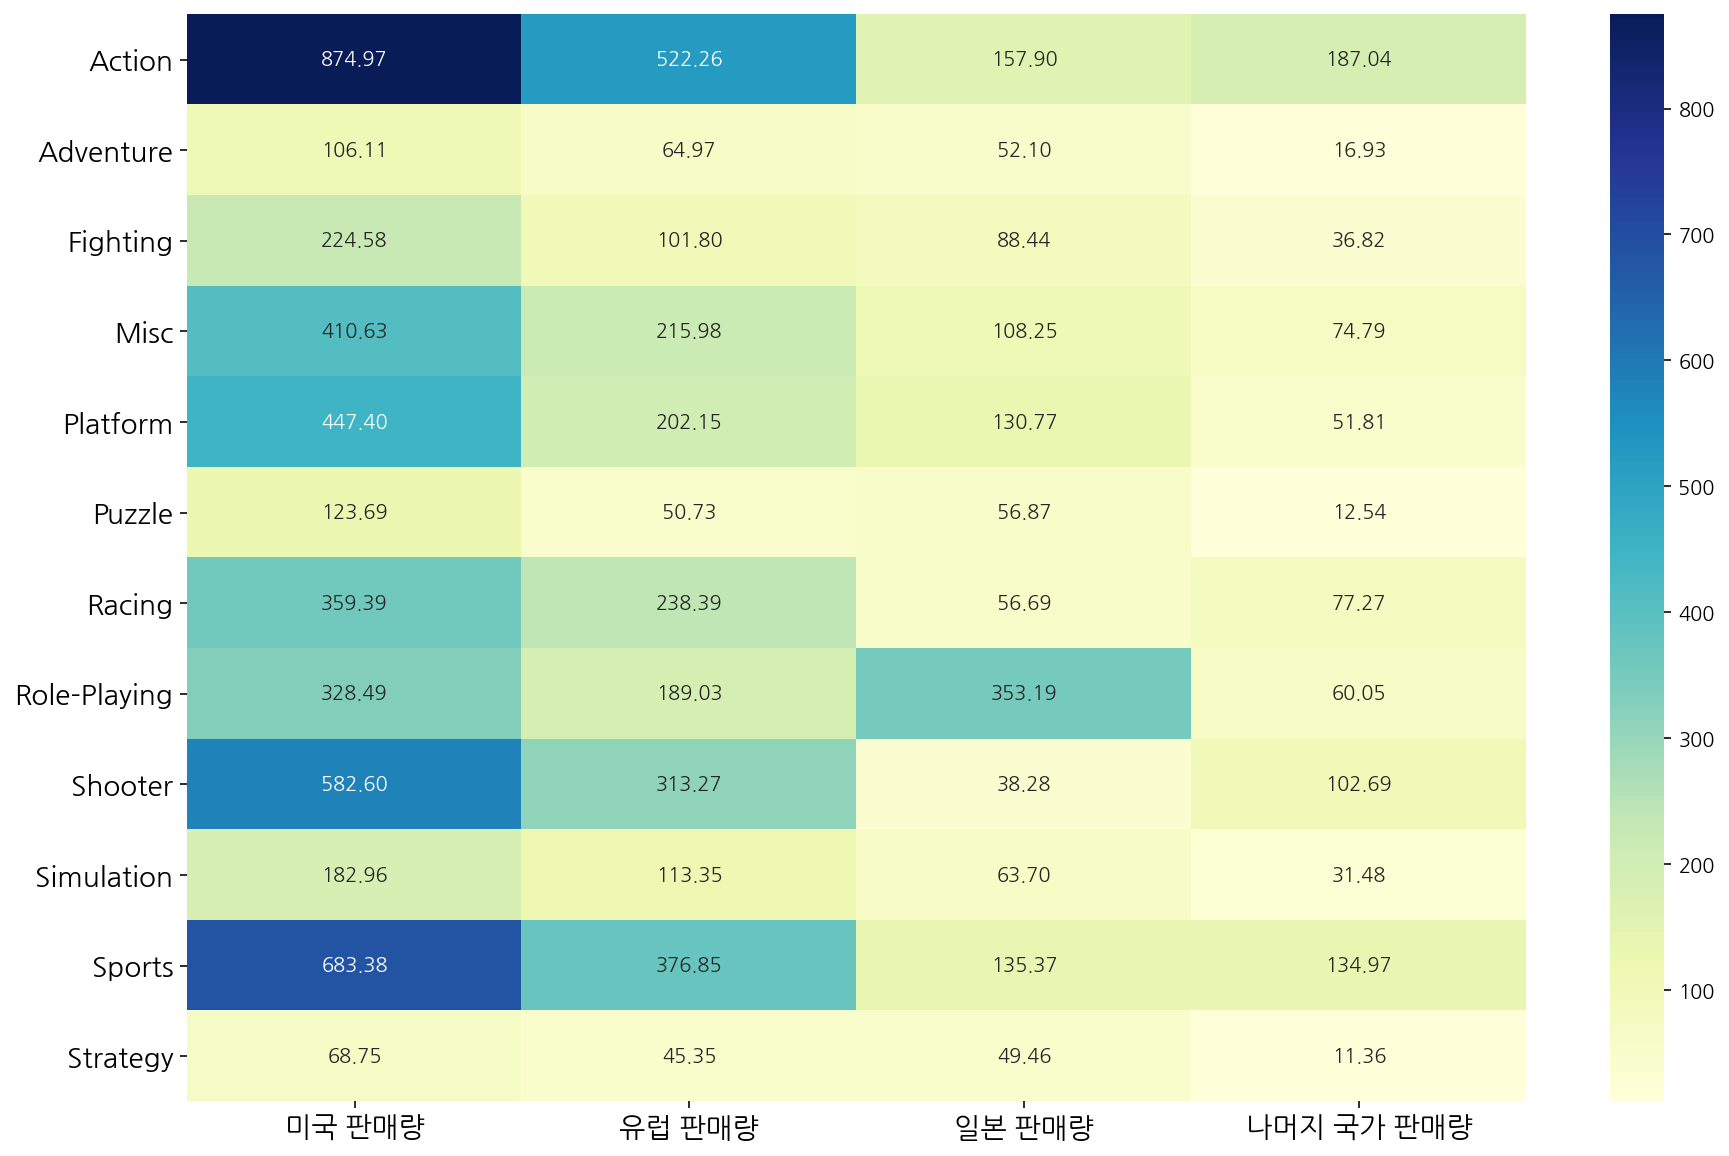

In [11]:
plt.figure(figsize=(15, 10))

a = sns.heatmap(temp_grouped, annot=True, fmt = '.2f', cmap="YlGnBu")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
a.set_ylabel('', fontsize=12)
plt.show()

## 1-3. 장르 선호도 국가별 TOP3

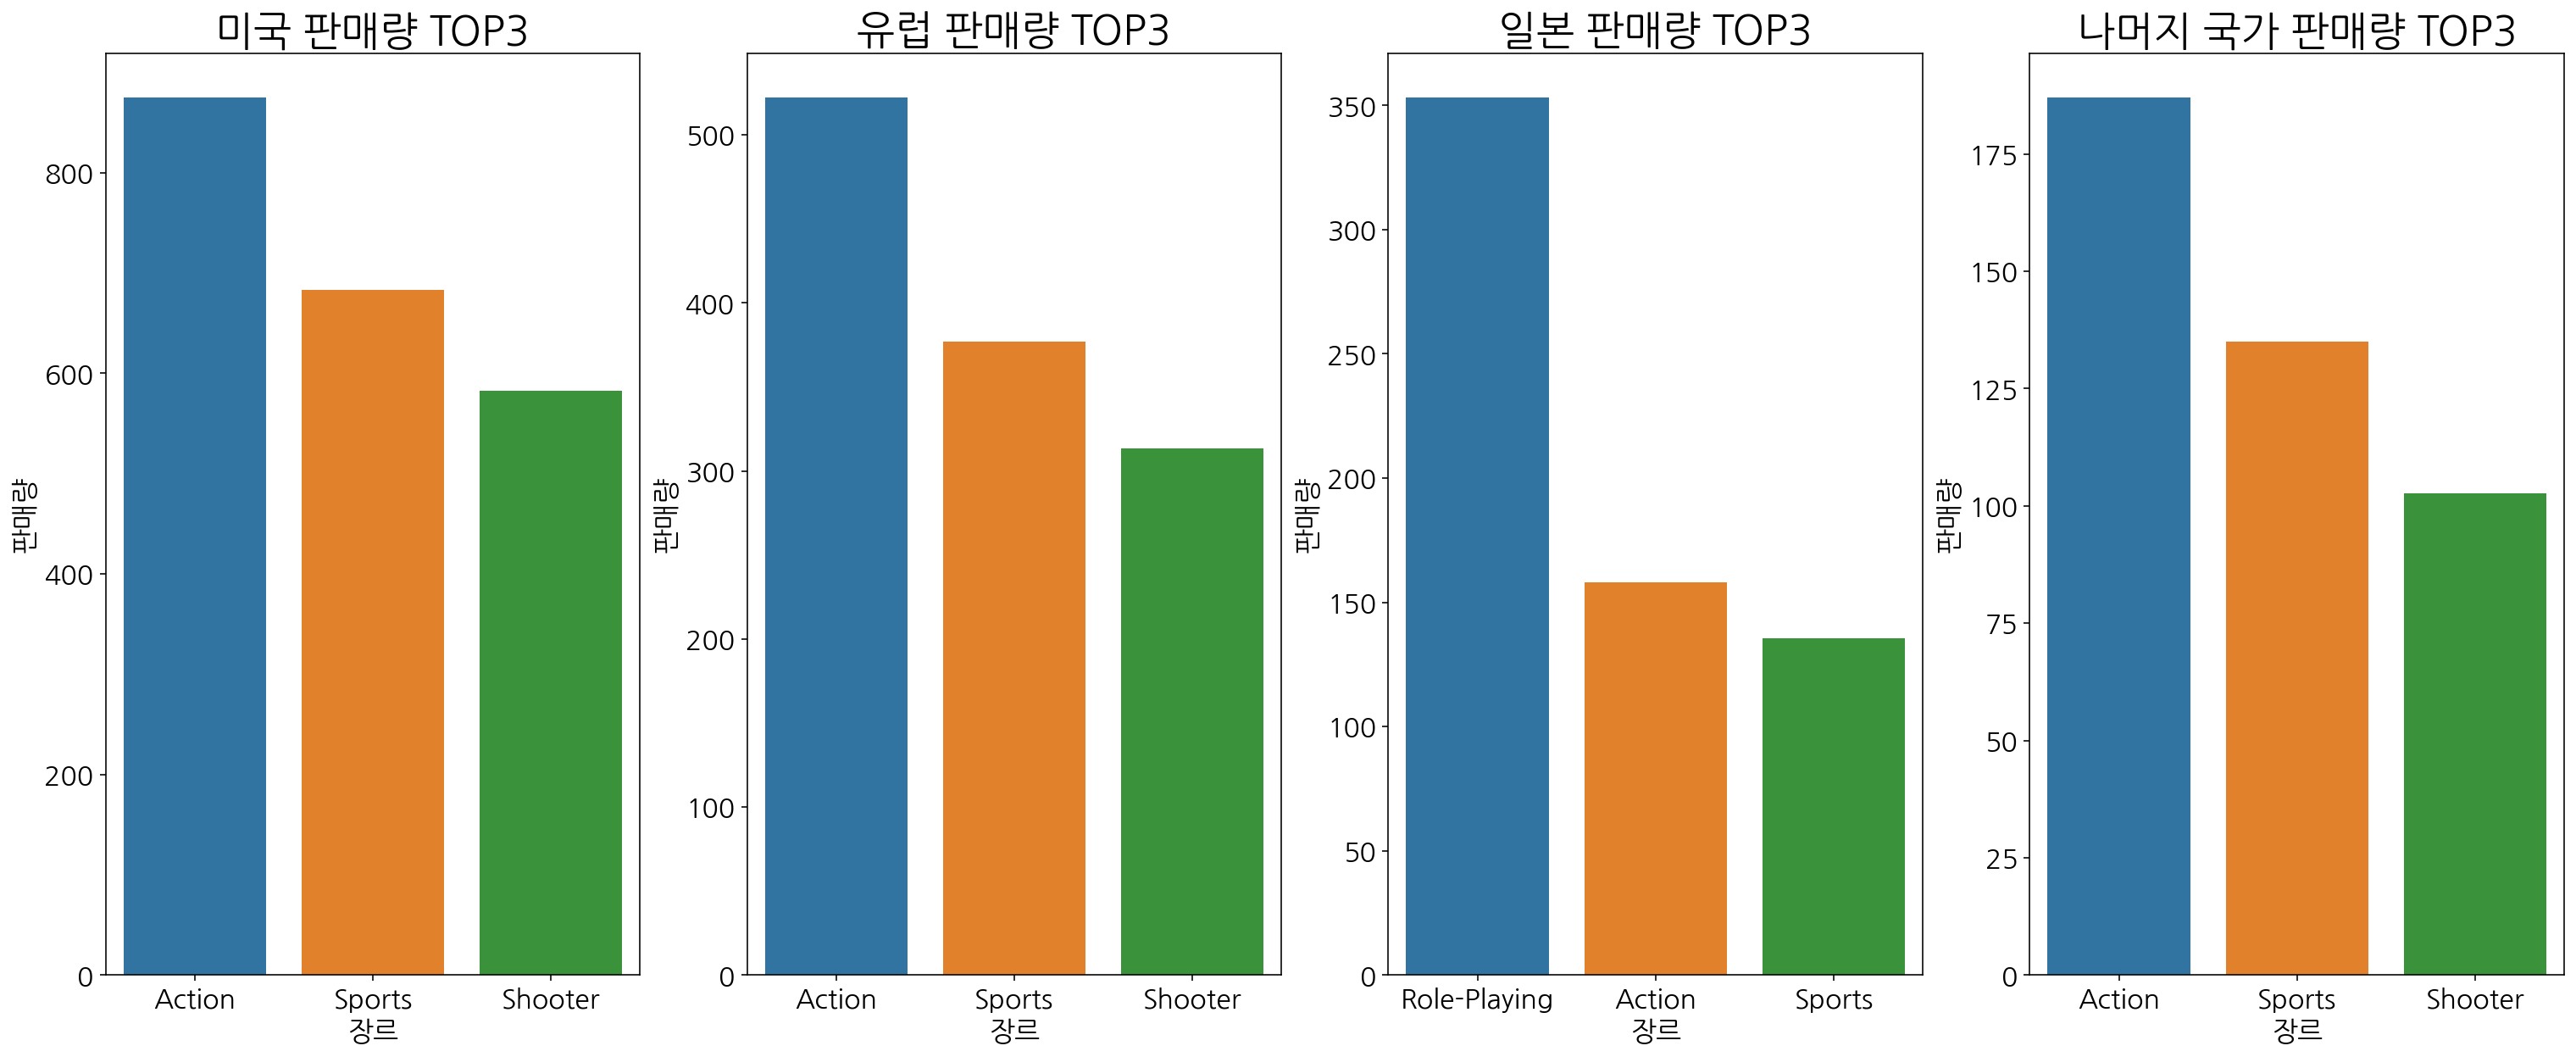

In [12]:
# 국가별 판매량 TOP3
def top3_genre(df, sales_col):
    new_df = df.loc[:, ['장르', sales_col]].sort_values(by=sales_col, ascending=False).reset_index(drop=True).head(3)
    new_df.columns = ['장르', '판매량']
    return new_df

# Top3 데이터 저장
na_genre_top3 = top3_genre(temp_table, '미국 판매량')
eu_genre_top3 = top3_genre(temp_table, '유럽 판매량')
jp_genre_top3 = top3_genre(temp_table, '일본 판매량')
other_genre_top3 = top3_genre(temp_table, '나머지 국가 판매량')
# 데이터 리스트에 담기
data_list = [na_genre_top3, eu_genre_top3, jp_genre_top3, other_genre_top3]
columns_list = temp_table.columns[1:]
# 막대 그래프 그리기
fig, axs = plt.subplots(figsize=(26, 10), nrows=1, ncols=4)
for col, i, data in zip(columns_list, range(len(columns_list)), data_list):
    axs[i].set_title(col + ' ' + 'TOP3', fontsize=24)
    sns.barplot(x='장르', y='판매량', data=data, ax=axs[i])
    axs[i].tick_params(axis='both',labelsize=16)
    axs[i].set_xlabel('장르', fontsize=16)
    axs[i].set_ylabel('판매량', fontsize=16)
plt.show()

## 1-4. 연도별 게임 출고량의 따른 장르 트렌드

In [13]:
# 년도별 장르 갯수
year_max_df = df.groupby(['Year', 'Genre']).size().reset_index(name='count')
# 가장 값이 큰 값만 뽑기
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
# 중복값 제외하기
year_max_genre = year_max_genre.drop_duplicates(subset=['Year','count'], keep='last').reset_index(drop=True)
year_max_genre[:5]
year_max_genre.columns = ['년도', '장르', '출시량']

In [14]:
# 장르값 할당
genre = year_max_genre['장르'].values
# genre[:5]

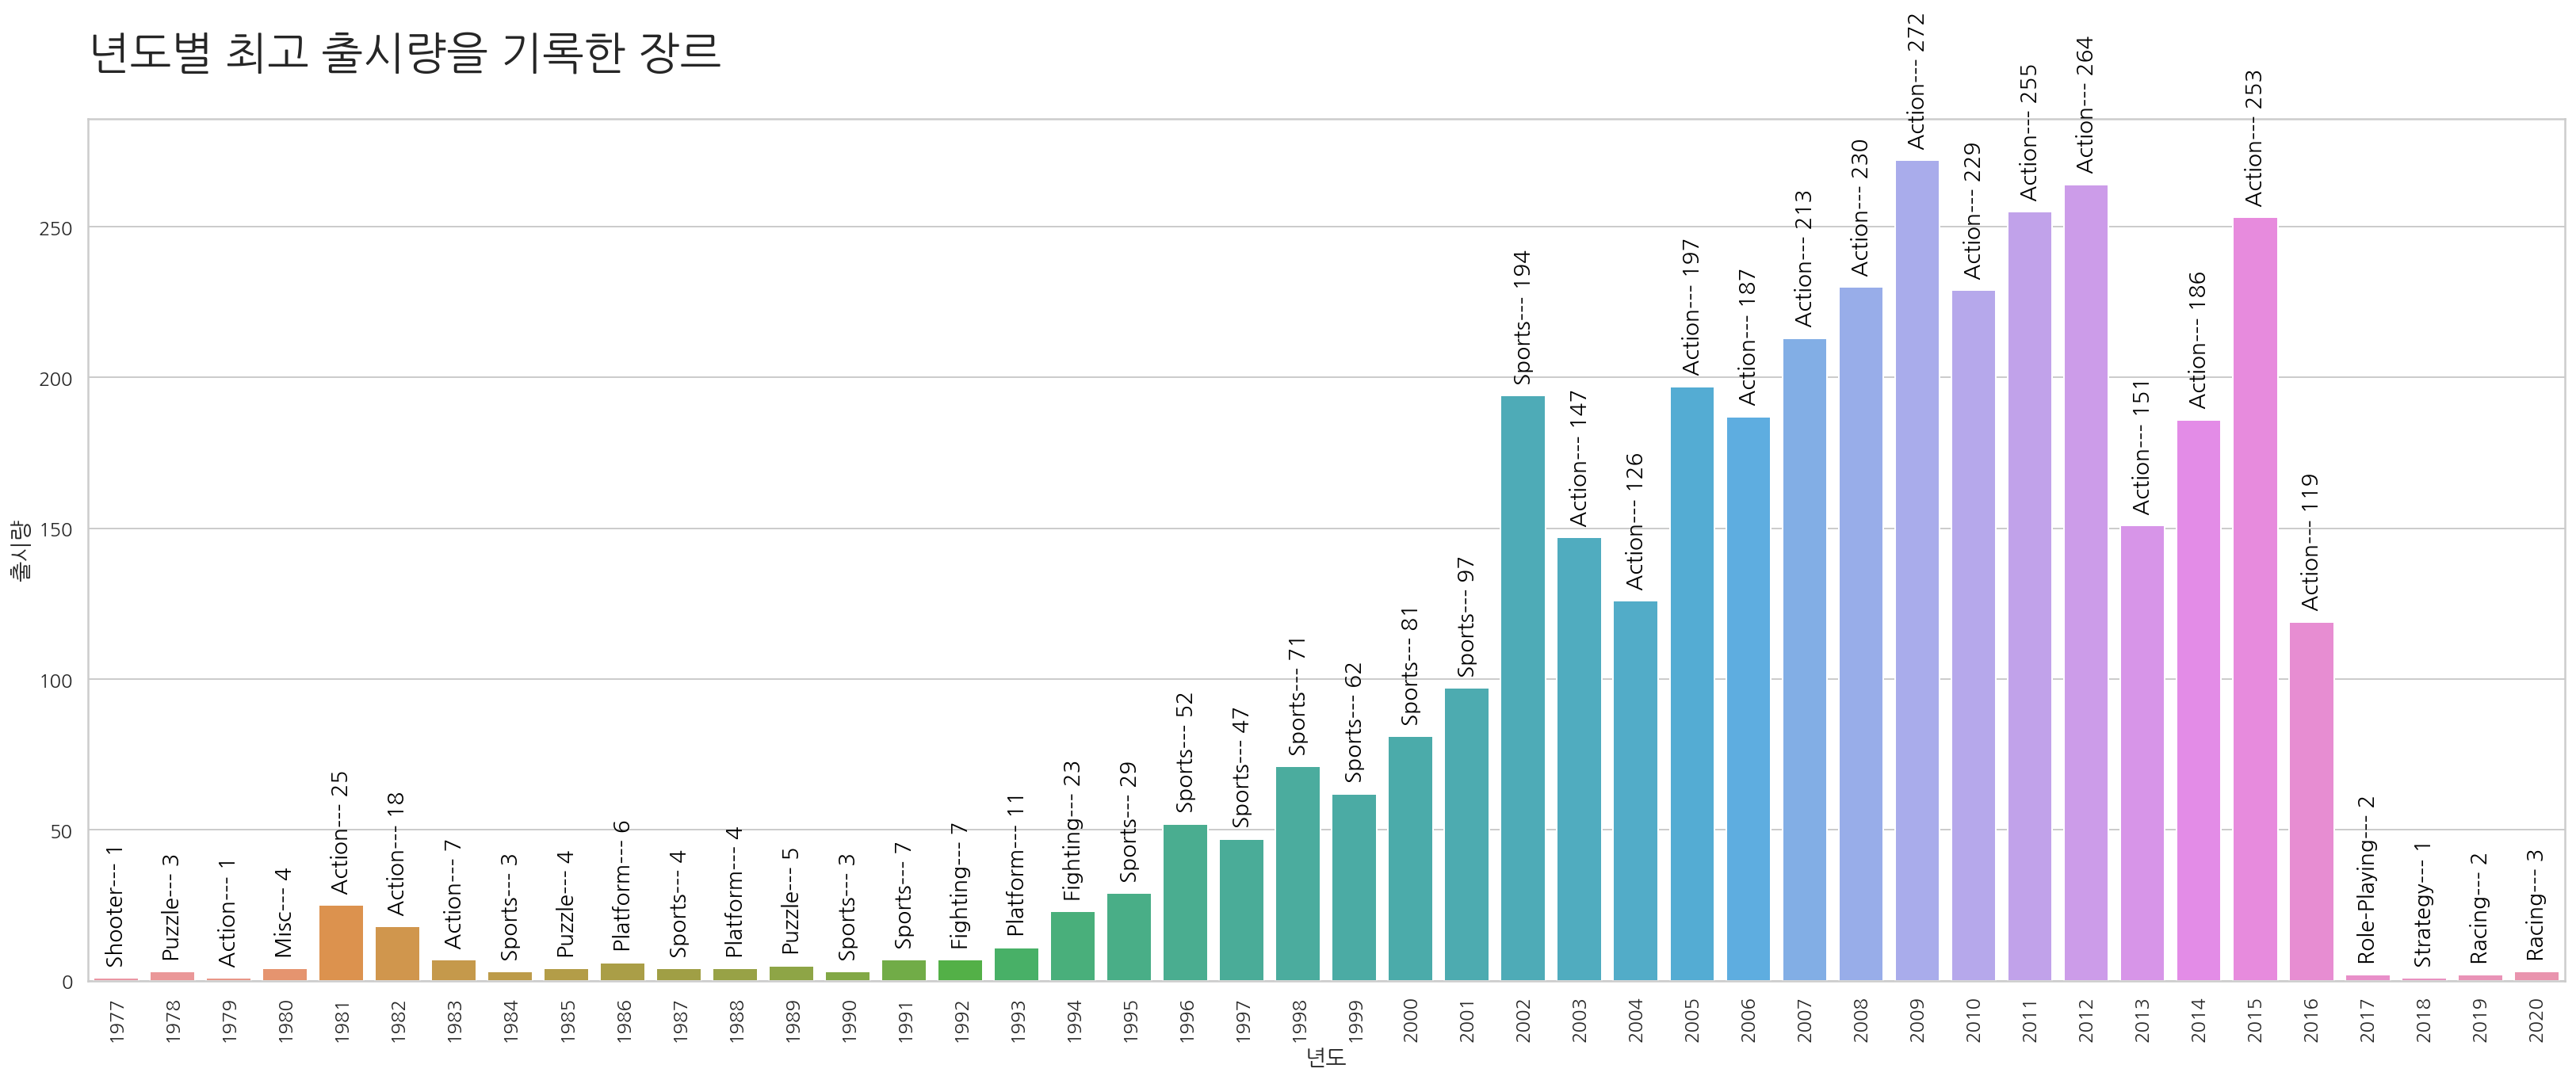

In [15]:
# 스타일 변경
sns.set_context('notebook')
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'NanumGothic'

plt.figure(figsize=(28,10))
ax = sns.barplot(x='년도', y='출시량', data=year_max_genre)
idx = 0
for value in year_max_genre['출시량']:
    ax.text(x=idx, y=value + 5, s=str(genre[idx] + '---' + ' ' + str(value)),
            color='black', size=14, rotation=90, ha='center')
    idx += 1
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('년도', fontsize=14)
plt.ylabel('출시량', fontsize=14)
ax.set_title('년도별 최고 출시량을 기록한 장르', fontsize=28, y=1.05, loc='left')
plt.show()

## 1-5. 연도별 최고 판매량을 기록한 장르

In [17]:
# 년도별 최고 판매량 기록한 장르 데이터프레임 만들기
year_max_sales = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()
condition = year_max_sales['Global_Sales'] == year_max_sales.groupby(['Year'])['Global_Sales'].transform(max)
year_max_sales = year_max_sales[condition]
year_max_sales.columns = ['년도', '장르', '전세계 판매량']
year_max_sales[:5]

,년도,장르,전세계 판매량
0,1977,Action,1.25
5,1978,Shooter,2.53
7,1979,Action,0.31
13,1980,Shooter,7.07
15,1981,Action,14.79


In [18]:
genre = year_max_sales['장르'].values

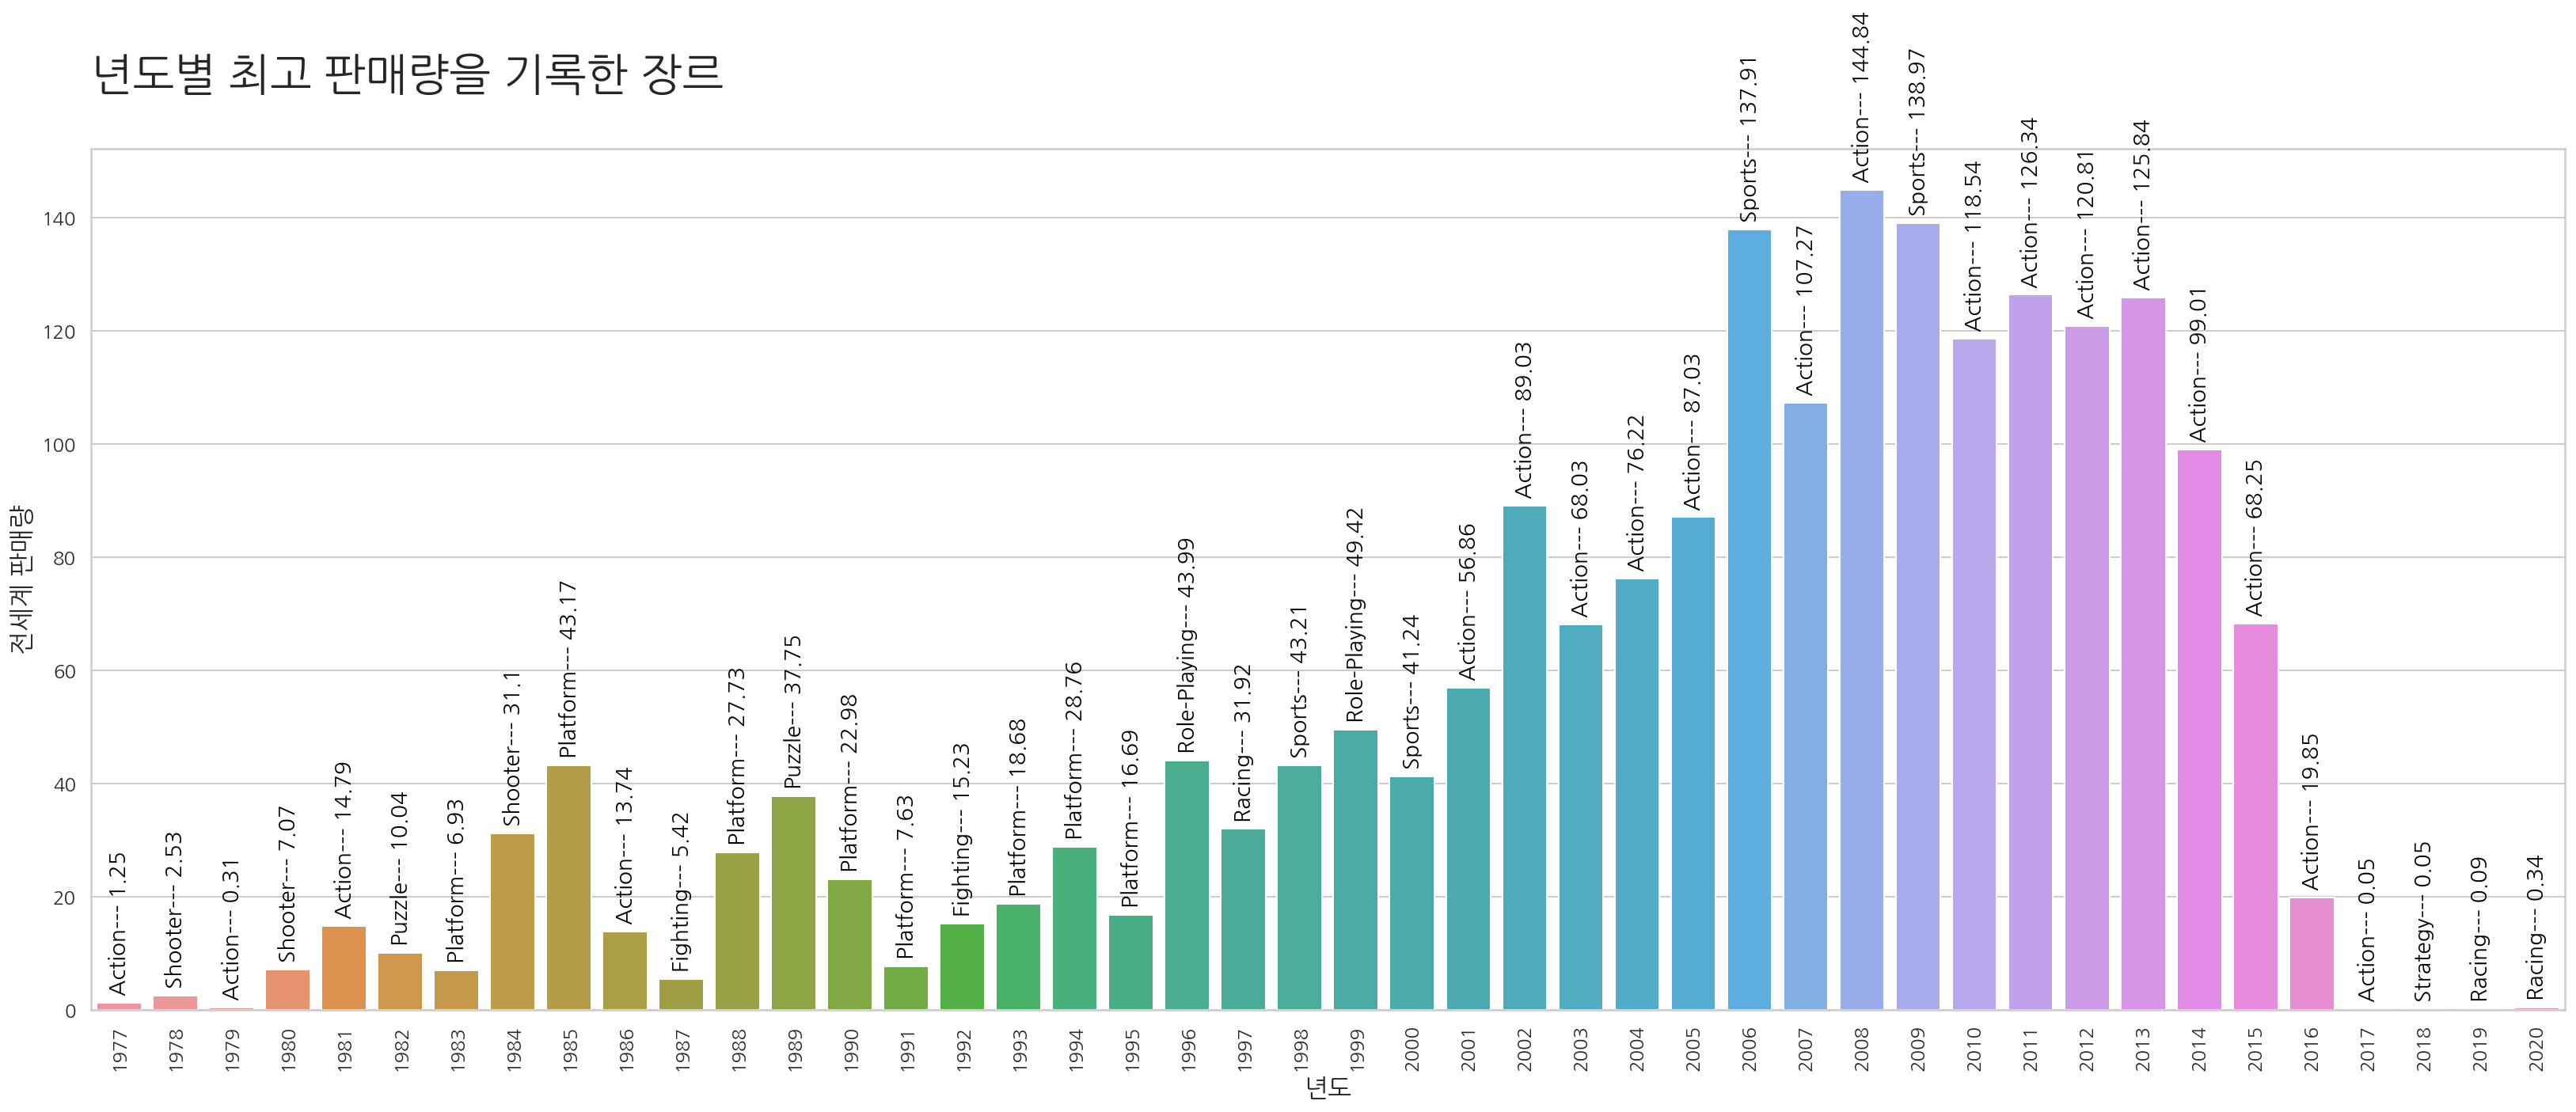

In [19]:
plt.figure(figsize=(28,10))
ax = sns.barplot(x='년도', y='전세계 판매량', data=year_max_sales)
idx = 0
for value in year_max_sales['전세계 판매량']:
    ax.text(x=idx, y=value + 2, s=str(genre[idx] + '---' + ' ' + str(round(value, 2))),
            color='black', size=14, rotation=90, ha='center')
    idx += 1
ax.set_title('년도별 최고 판매량을 기록한 장르', y=1.06, fontsize=28, loc='left')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('년도', fontsize=16)
plt.ylabel('전세계 판매량', fontsize=16)
plt.show()

In [21]:
genre_pf = df.groupby(['Genre', 'Platform']).size().reset_index(name='count')
condition = genre_pf.groupby(['Genre'])['count'].transform(max) == genre_pf['count']
genre_pf[condition]

,Genre,Platform,count
13,Action,PS3,376
28,Adventure,DS,240
62,Fighting,PS2,151
76,Misc,DS,393
103,Platform,GBA,142
127,Puzzle,DS,239
158,Racing,PS2,216
173,Role-Playing,DS,200
219,Shooter,X360,203
226,Simulation,DS,284


# 2. 플랫폼 분석

## 2-1. 플랫폼별 판매량 막대 그래프

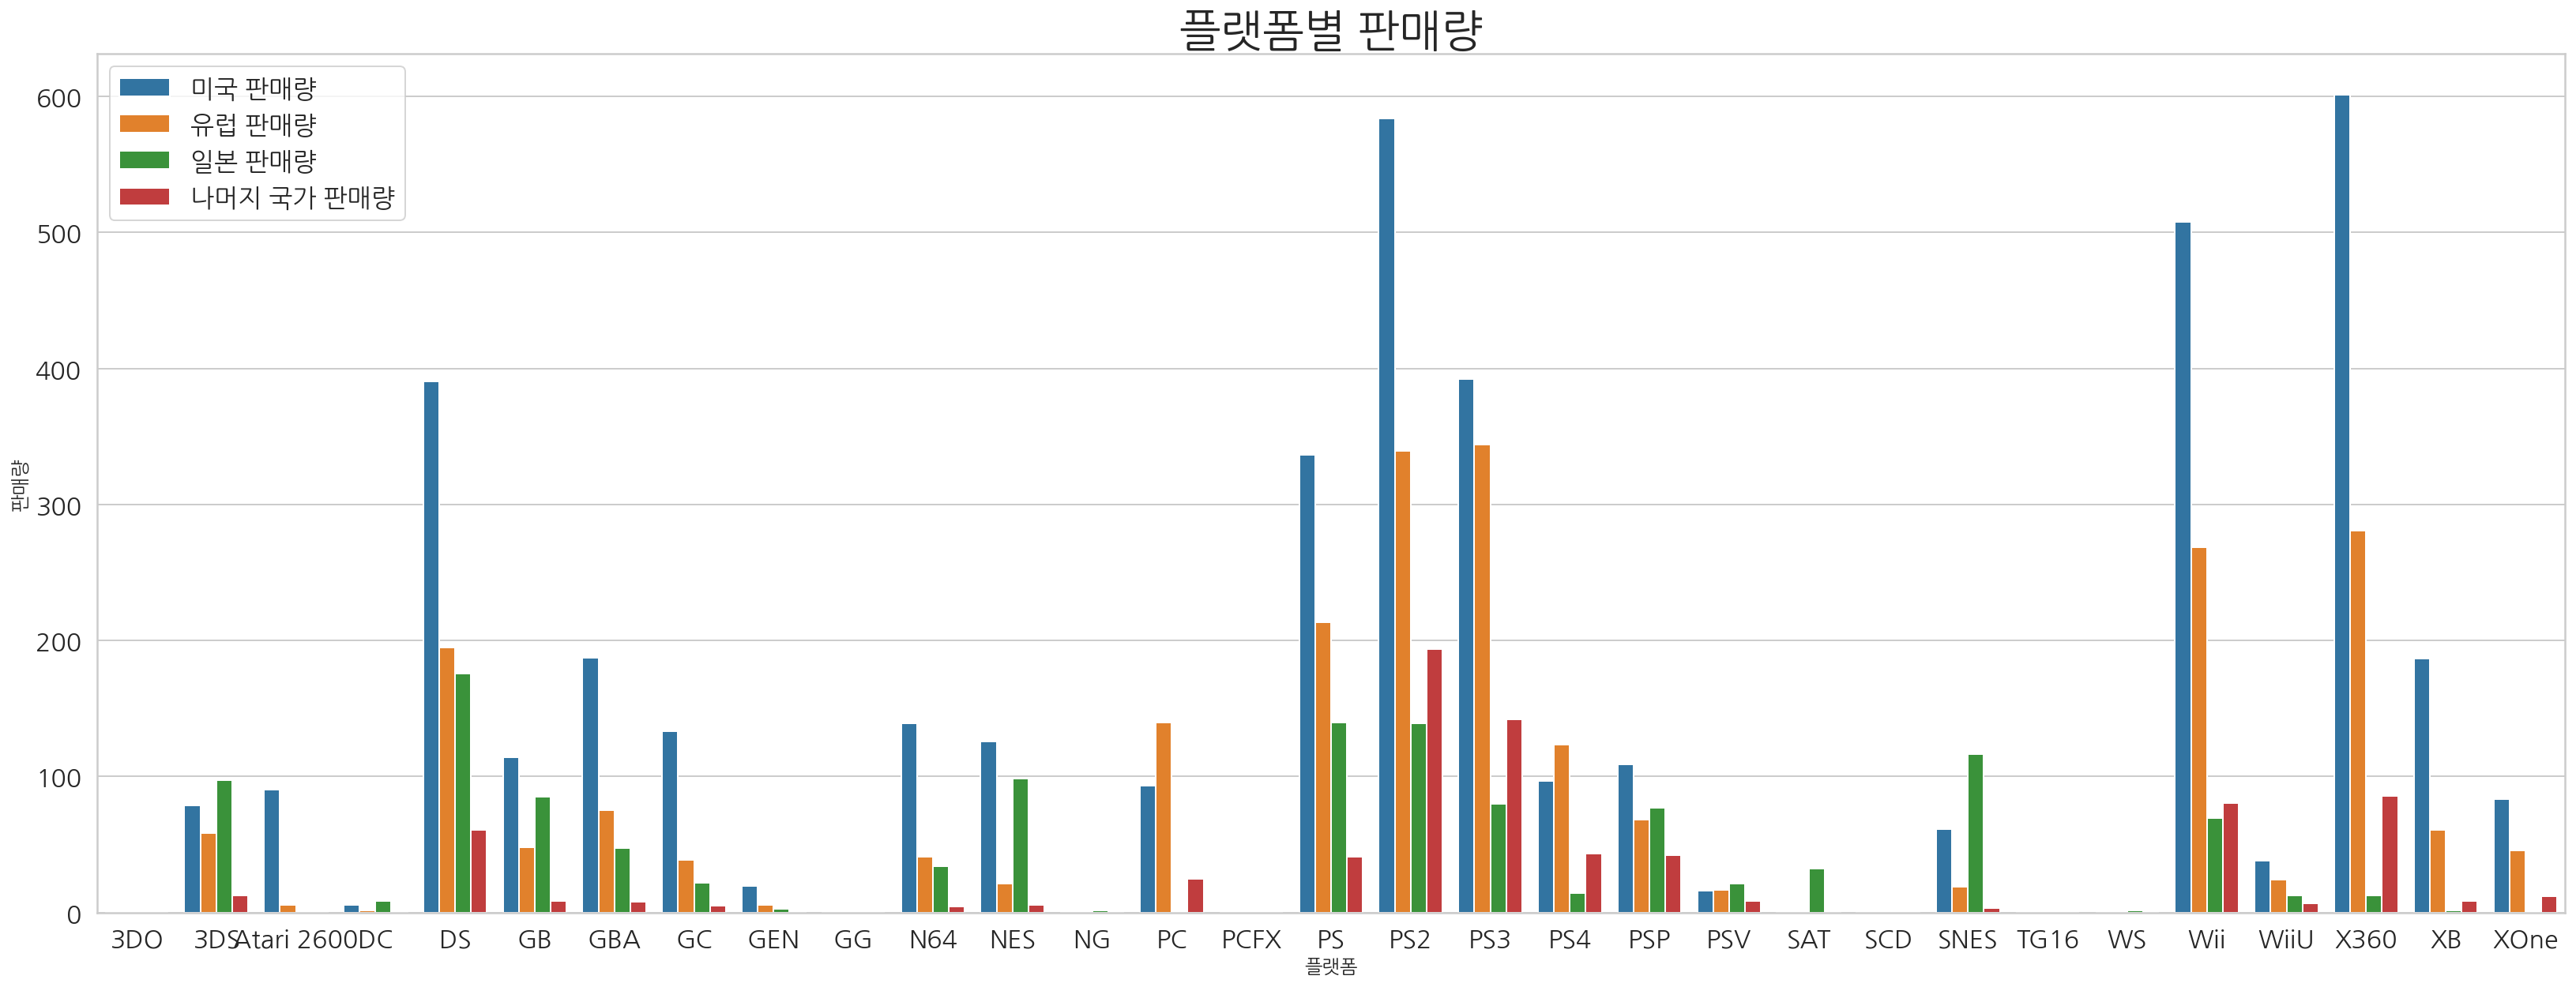

In [30]:
# 지역별 플랫폼 선호도 분석
pf_by_sales = df[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
pf_by_sales.columns = ['플랫폼', '미국 판매량', '유럽 판매량', '일본 판매량', '나머지 국가 판매량']
pf_by_sales_grouped = pf_by_sales.groupby(by=['플랫폼']).sum()
pf_by_sales_df = pf_by_sales_grouped.reset_index()
pf_by_sales_mt = pd.melt(pf_by_sales_df, id_vars=['플랫폼'], value_vars=pf_by_sales.columns[1:],
                         var_name='판매국가', value_name='판매량')

# pf_by_sales_mt

plt.figure(figsize=(28,10))
ax = sns.barplot(x='플랫폼', y='판매량', hue='판매국가', data=pf_by_sales_mt)
ax.set_title('플랫폼별 판매량', fontsize=28)
ax.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()               

## 2-2. 플랫폼별 판매량 TOP3

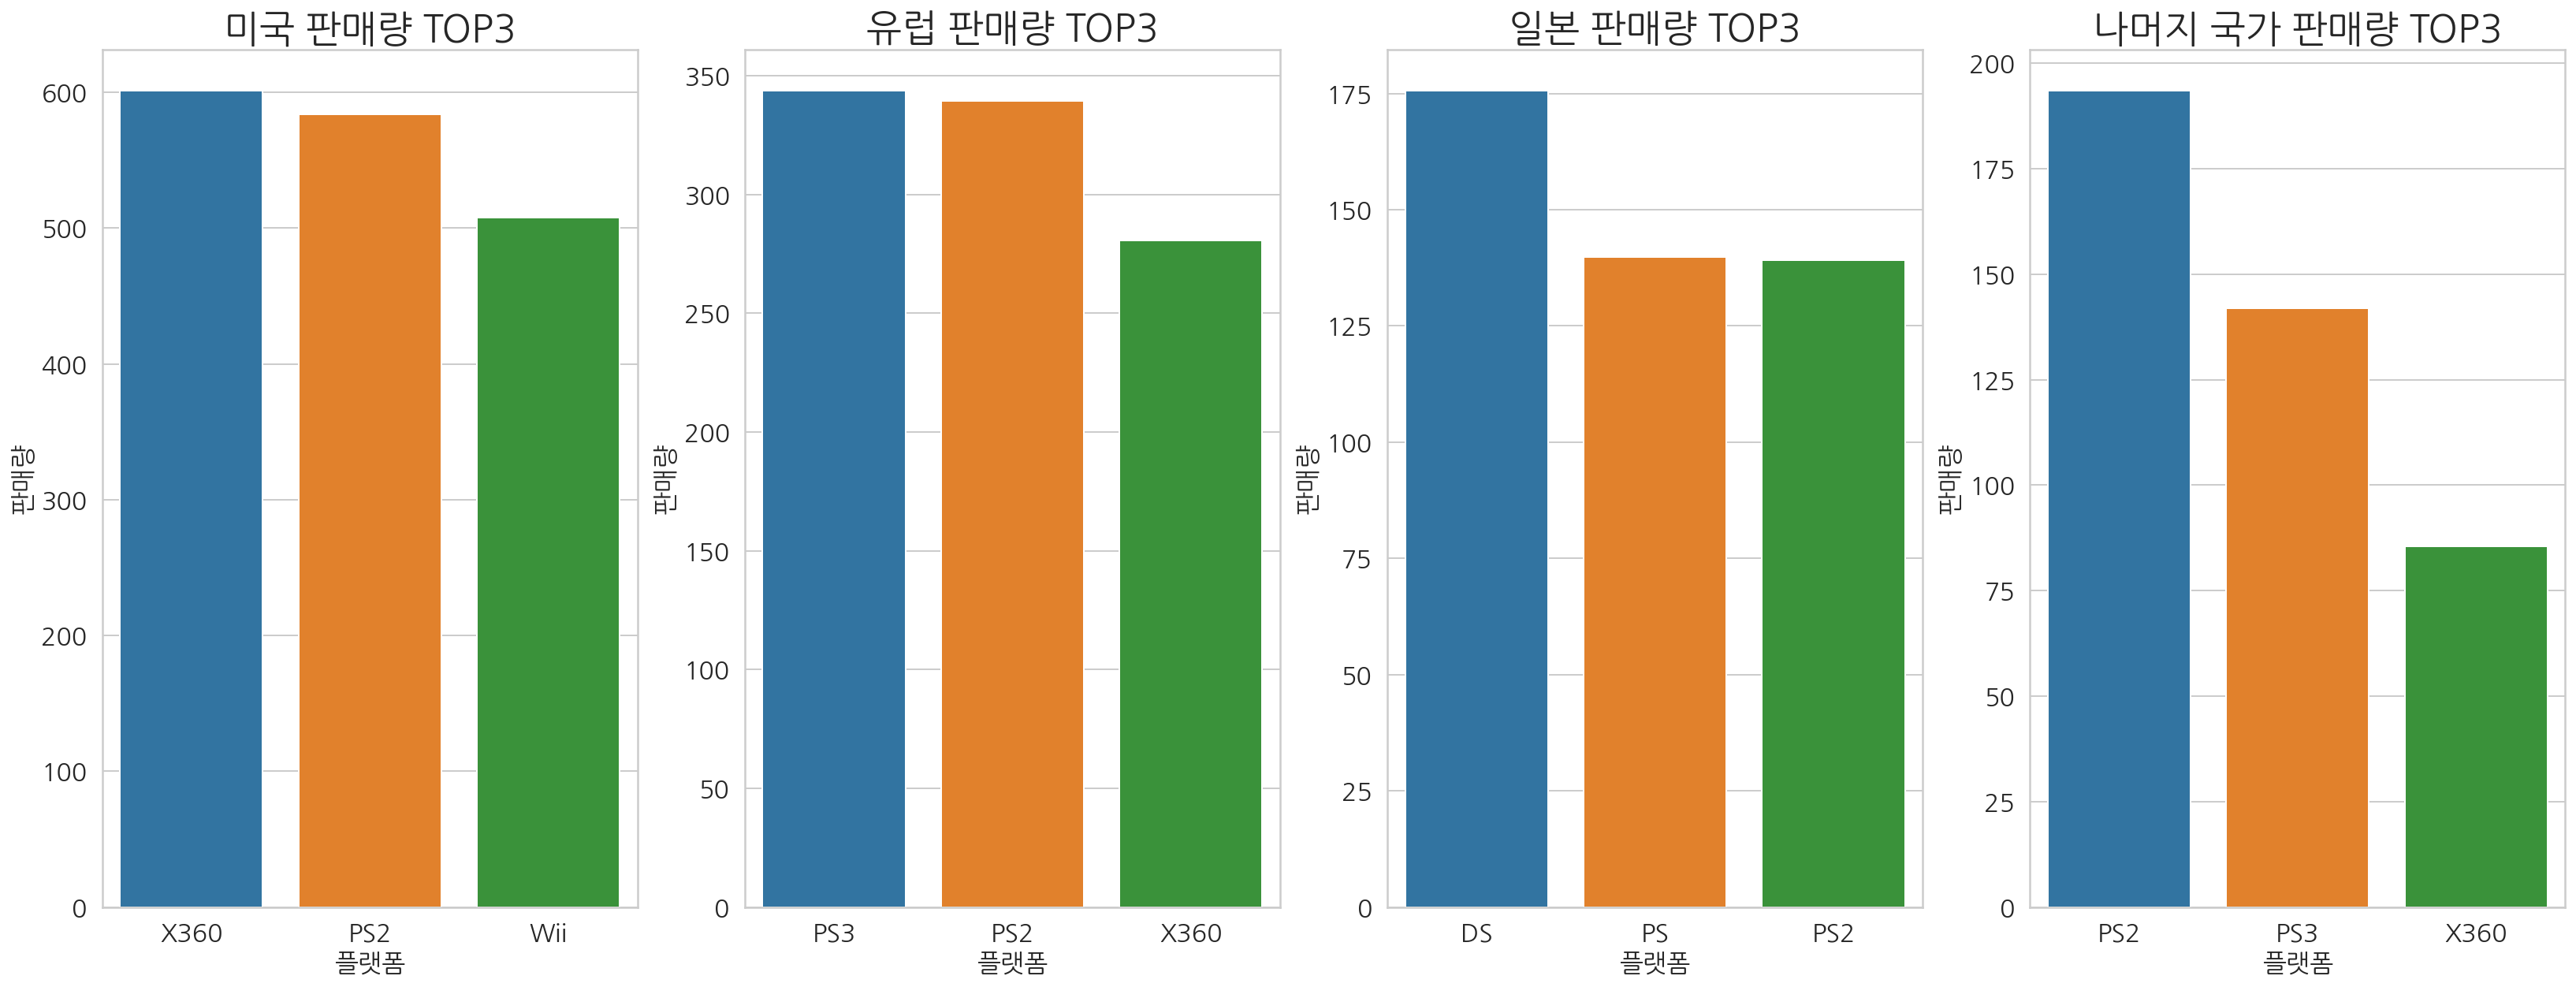

In [31]:
def top3_platform(df, sales_col):
    new_df = df.loc[:, ['플랫폼', sales_col]].sort_values(by=sales_col, ascending=False).reset_index(drop=True).head(3)
    new_df.columns = ['플랫폼', '판매량']
    return new_df
na_platform_t3 = top3_platform(pf_by_sales_df, '미국 판매량')
eu_platform_t3 = top3_platform(pf_by_sales_df, '유럽 판매량')
jp_platform_t3 = top3_platform(pf_by_sales_df, '일본 판매량')
other_platform_t3 = top3_platform(pf_by_sales_df, '나머지 국가 판매량')

# 데이터 리스트에 담기
data_list = [na_platform_t3, eu_platform_t3, jp_platform_t3, other_platform_t3]
columns_list = pf_by_sales.columns[1:]
# 막대 그래프 그리기
fig, axs = plt.subplots(figsize=(28, 10), nrows=1, ncols=4)
for col, i, data in zip(columns_list, range(len(columns_list)), data_list):
    axs[i].set_title(col + ' ' + 'TOP3', fontsize=24)
    sns.barplot(x='플랫폼', y='판매량', data=data, ax=axs[i])
    axs[i].tick_params(labelsize=16)
    axs[i].set_xlabel('플랫폼', fontsize=16)
    axs[i].set_ylabel('판매량', fontsize=16)
    
plt.show()

## 2-3. 년도별 출시량이 제일 많았던 플랫폼

In [33]:
# 년도별 플랫폼 갯수
year_max_pf = df.groupby(['Year', 'Platform']).size().reset_index(name='count')
# 가장 값이 큰 값만 뽑기
condition = year_max_pf.groupby(['Year'])['count'].transform(max) == year_max_pf['count']
year_max_pf = year_max_pf[condition].reset_index(drop=True)
# 중복값 제외하기
year_max_pf = year_max_pf.drop_duplicates(subset=['Year','count'], keep='last').reset_index(drop=True)
year_max_pf.columns = ['년도', '플랫폼', '출시량']
year_max_pf[:5]

,년도,플랫폼,출시량
0,1977,Atari 2600,3
1,1978,Atari 2600,6
2,1979,Atari 2600,1
3,1980,Atari 2600,14
4,1981,Atari 2600,46


In [34]:
# 플랫폼값 할당
platform = year_max_pf['플랫폼'].values

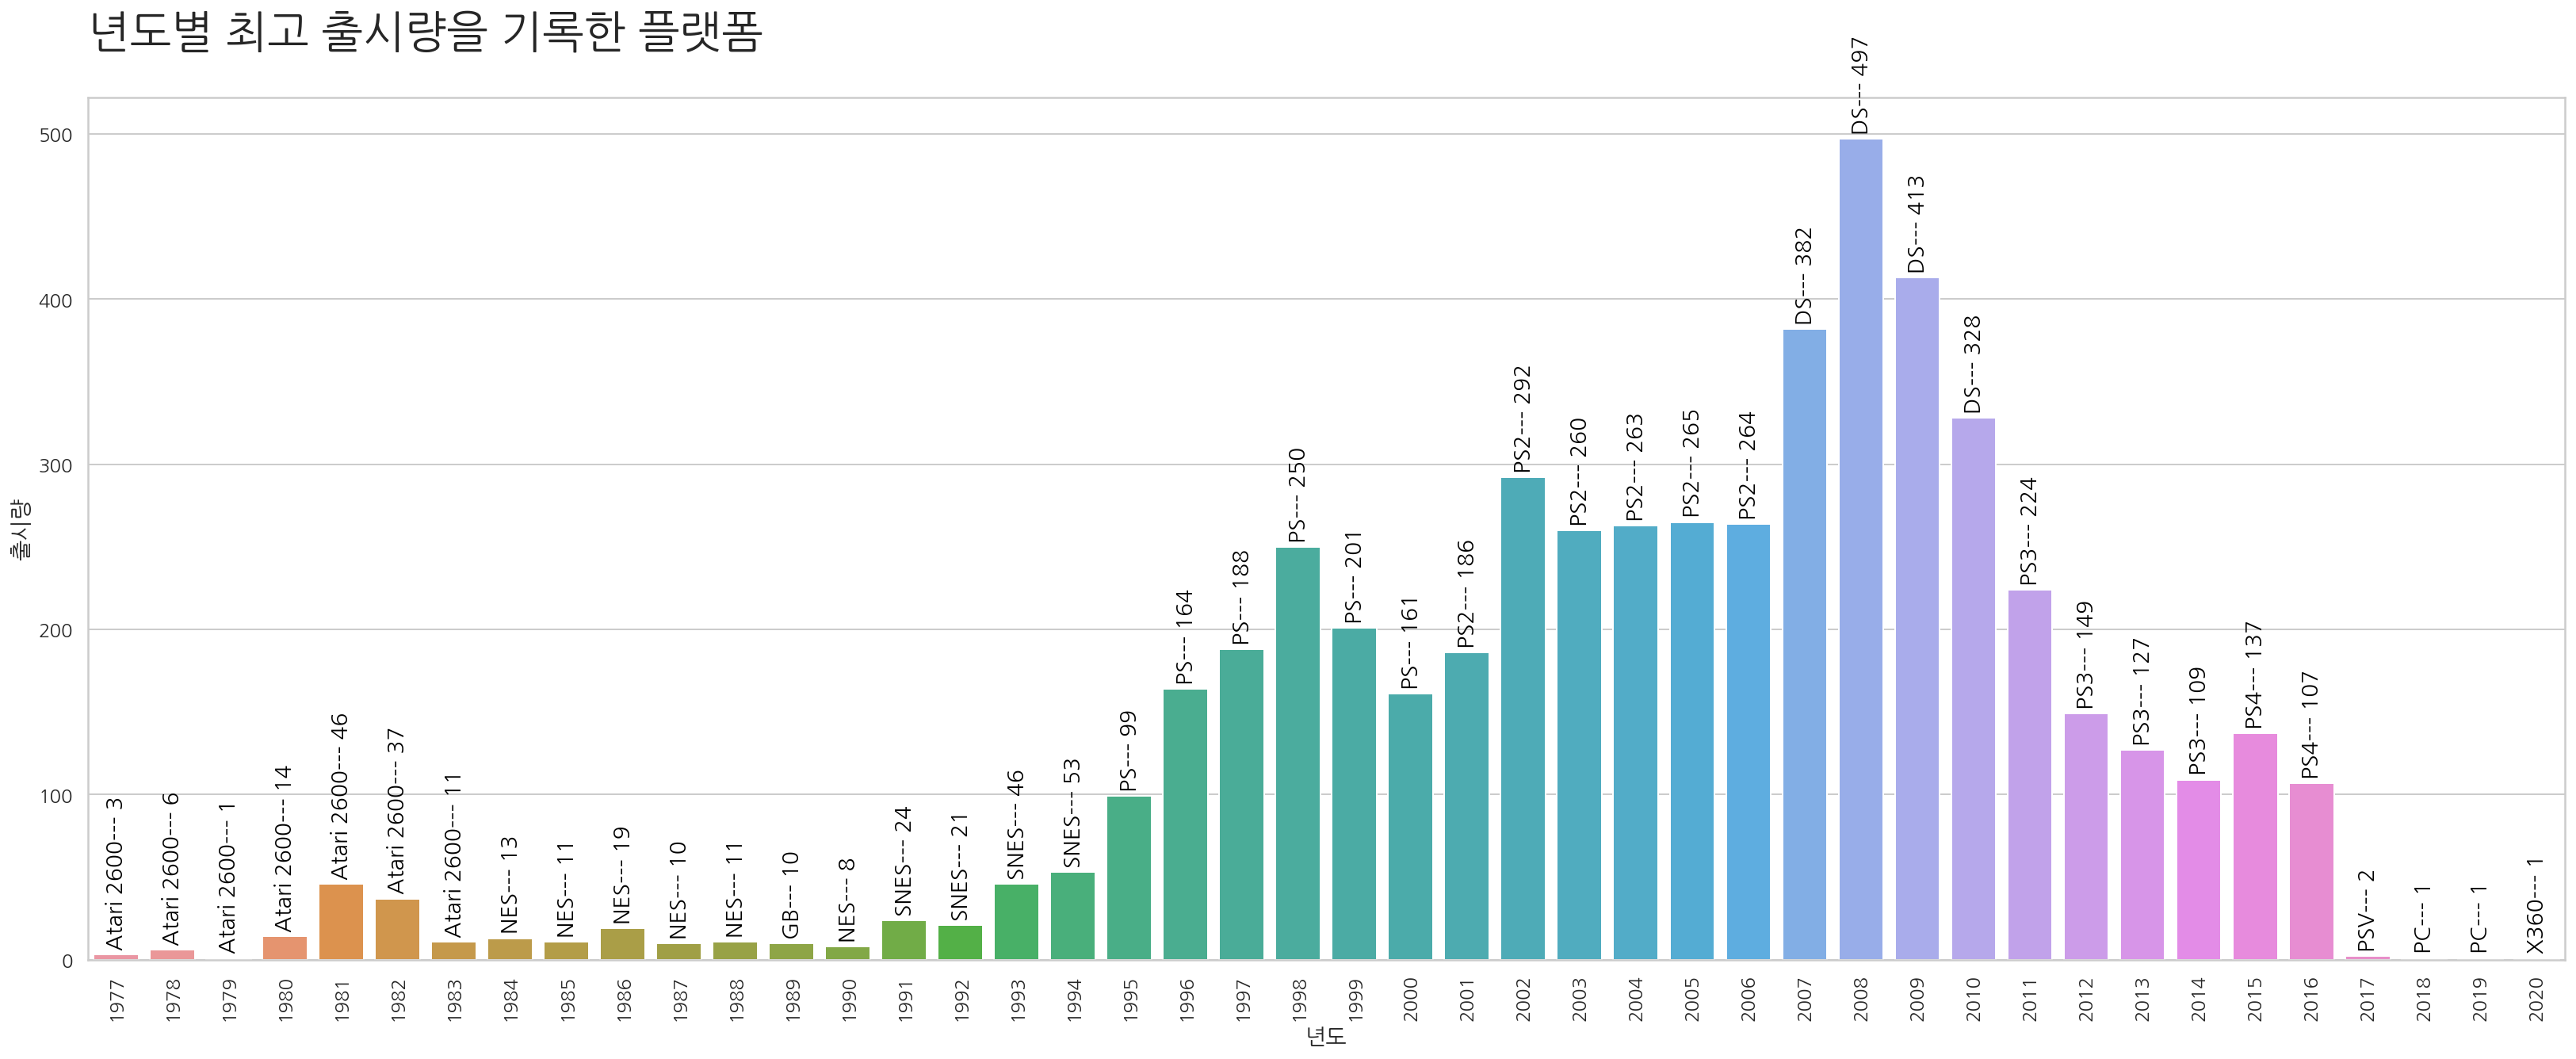

In [35]:
plt.figure(figsize=(28,10))
ax = sns.barplot(x='년도', y='출시량', data=year_max_pf)
idx = 0
for value in year_max_pf['출시량']:
    ax.text(x=idx, y=value + 5, s=str(platform[idx] + '---' + ' ' + str(value)),
            color='black', size=14, rotation=90, ha='center')
    idx += 1
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('년도', fontsize=14)
plt.ylabel('출시량', fontsize=14)
ax.set_title('년도별 최고 출시량을 기록한 플랫폼', fontsize=28, y=1.05, loc='left')
plt.show()

## 2-4. 년도별 최고 판매량을 기록했던 플랫폼

In [36]:
# 년도별 최고 판매량 기록한 장르 데이터프레임 만들기
year_max_sales = df.groupby(['Year', 'Platform'])['Global_Sales'].sum().reset_index()
condition = year_max_sales['Global_Sales'] == year_max_sales.groupby(['Year'])['Global_Sales'].transform(max)
year_max_sales = year_max_sales[condition]
year_max_sales.columns = ['년도', '플랫폼', '전세계 판매량']
year_max_sales[:5]

,년도,플랫폼,전세계 판매량
0,1977,Atari 2600,2.50
1,1978,Atari 2600,3.97
2,1979,Atari 2600,0.31
3,1980,Atari 2600,14.42
4,1981,Atari 2600,35.68


In [37]:
platform = year_max_sales['플랫폼'].values

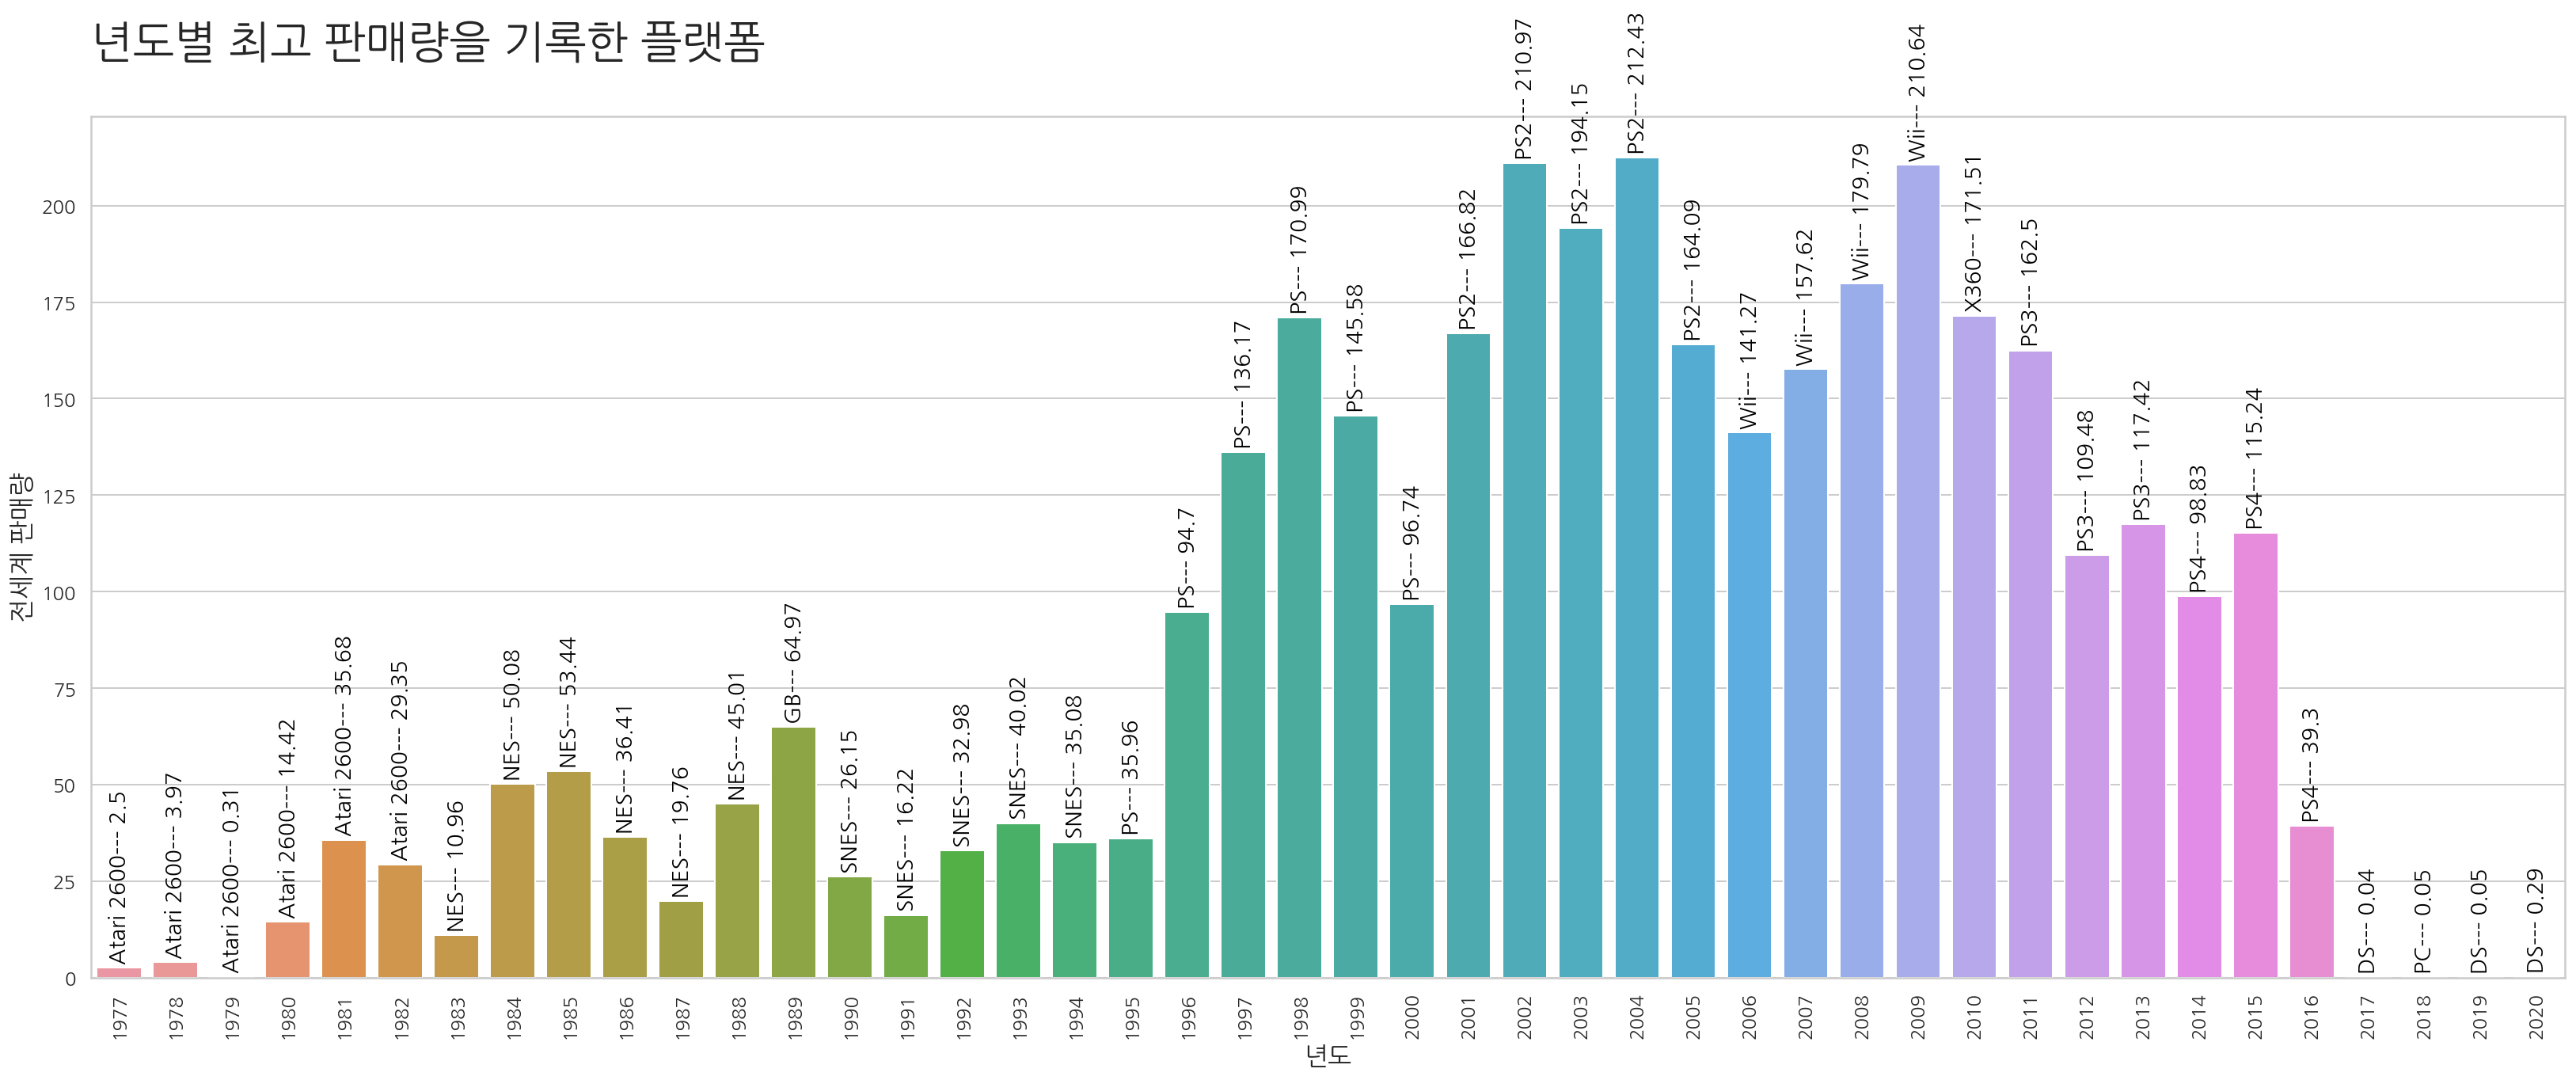

In [38]:
plt.figure(figsize=(28,10))
ax = sns.barplot(x='년도', y='전세계 판매량', data=year_max_sales)
idx = 0
for value in year_max_sales['전세계 판매량']:
    ax.text(x=idx, y=value + 2, s=str(platform[idx] + '---' + ' ' + str(round(value, 2))),
            color='black', size=14, rotation=90, ha='center')
    idx += 1
ax.set_title('년도별 최고 판매량을 기록한 플랫폼', y=1.06, fontsize=28, loc='left')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('년도', fontsize=16)
plt.ylabel('전세계 판매량', fontsize=16)
plt.show()

# 3. 게임회사 분석

## 3-1. 게임회사별 판매량

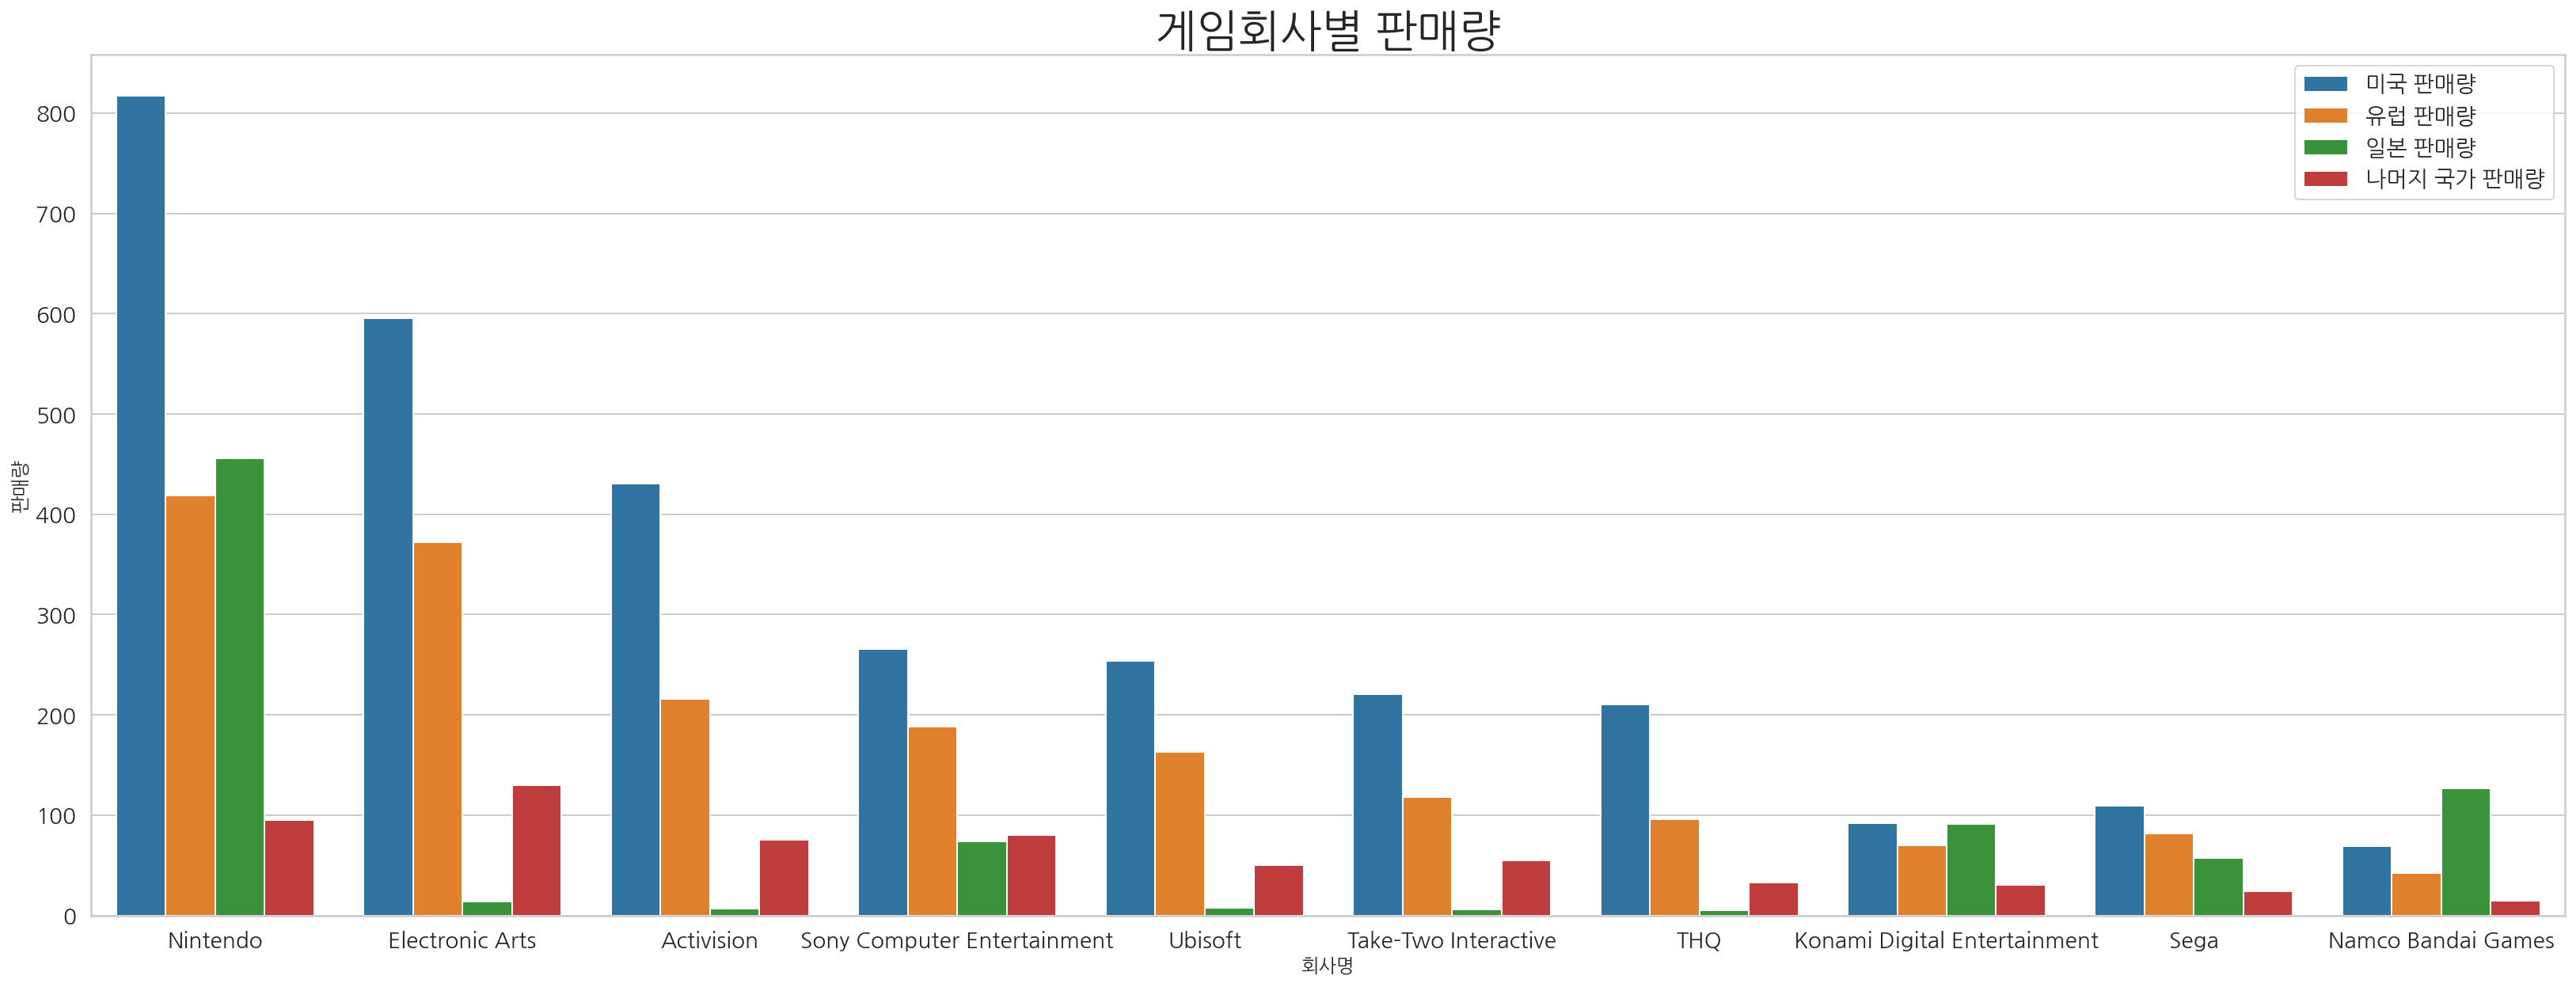

In [39]:
# 게임 회사별 판매량 막대 그래프
publisher_by_sales = df[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
publisher_by_sales.columns = ['회사명', '미국 판매량', '유럽 판매량', '일본 판매량', '나머지 국가 판매량', '전세계 판매량']

publisher_by_sales_grouped = publisher_by_sales.groupby(by=['회사명']).sum()

publisher_by_sales_df = publisher_by_sales_grouped.reset_index().sort_values(by=['전세계 판매량'], ascending=False).head(10)
publisher_by_sales_mt = pd.melt(publisher_by_sales_df, id_vars=['회사명'], value_vars=publisher_by_sales.columns[1:-1],
                         var_name='판매국가', value_name='판매량')


plt.figure(figsize=(28,10))
ax = sns.barplot(x='회사명', y='판매량', hue='판매국가', data=publisher_by_sales_mt)
ax.set_title('게임회사별 판매량', fontsize=28)
ax.tick_params(labelsize=14)
ax.legend(fontsize=14)
plt.show()    

## 3-2. 년도별 최고 출시량을 기록한 회사

In [40]:
# 출시량 데이터 프레임 만들기
year_max_com = df.groupby(['Year', 'Publisher']).size().reset_index(name='count')
condition = year_max_com['count'] == year_max_com.groupby(['Year'])['count'].transform(max)
year_max_com = year_max_com[condition]
# year_max_com[:15]

# 중복값 제외하기
year_max_com = year_max_com.drop_duplicates(subset=['Year','count'], keep='last').reset_index(drop=True)
year_max_com.columns = ['년도', '회사명', '출시량']
year_max_com[:5]

,년도,회사명,출시량
0,1977,Atari,3
1,1978,Atari,5
2,1979,Atari,1
3,1980,Atari,7
4,1981,Atari,11


In [41]:
publisher = year_max_com.회사명

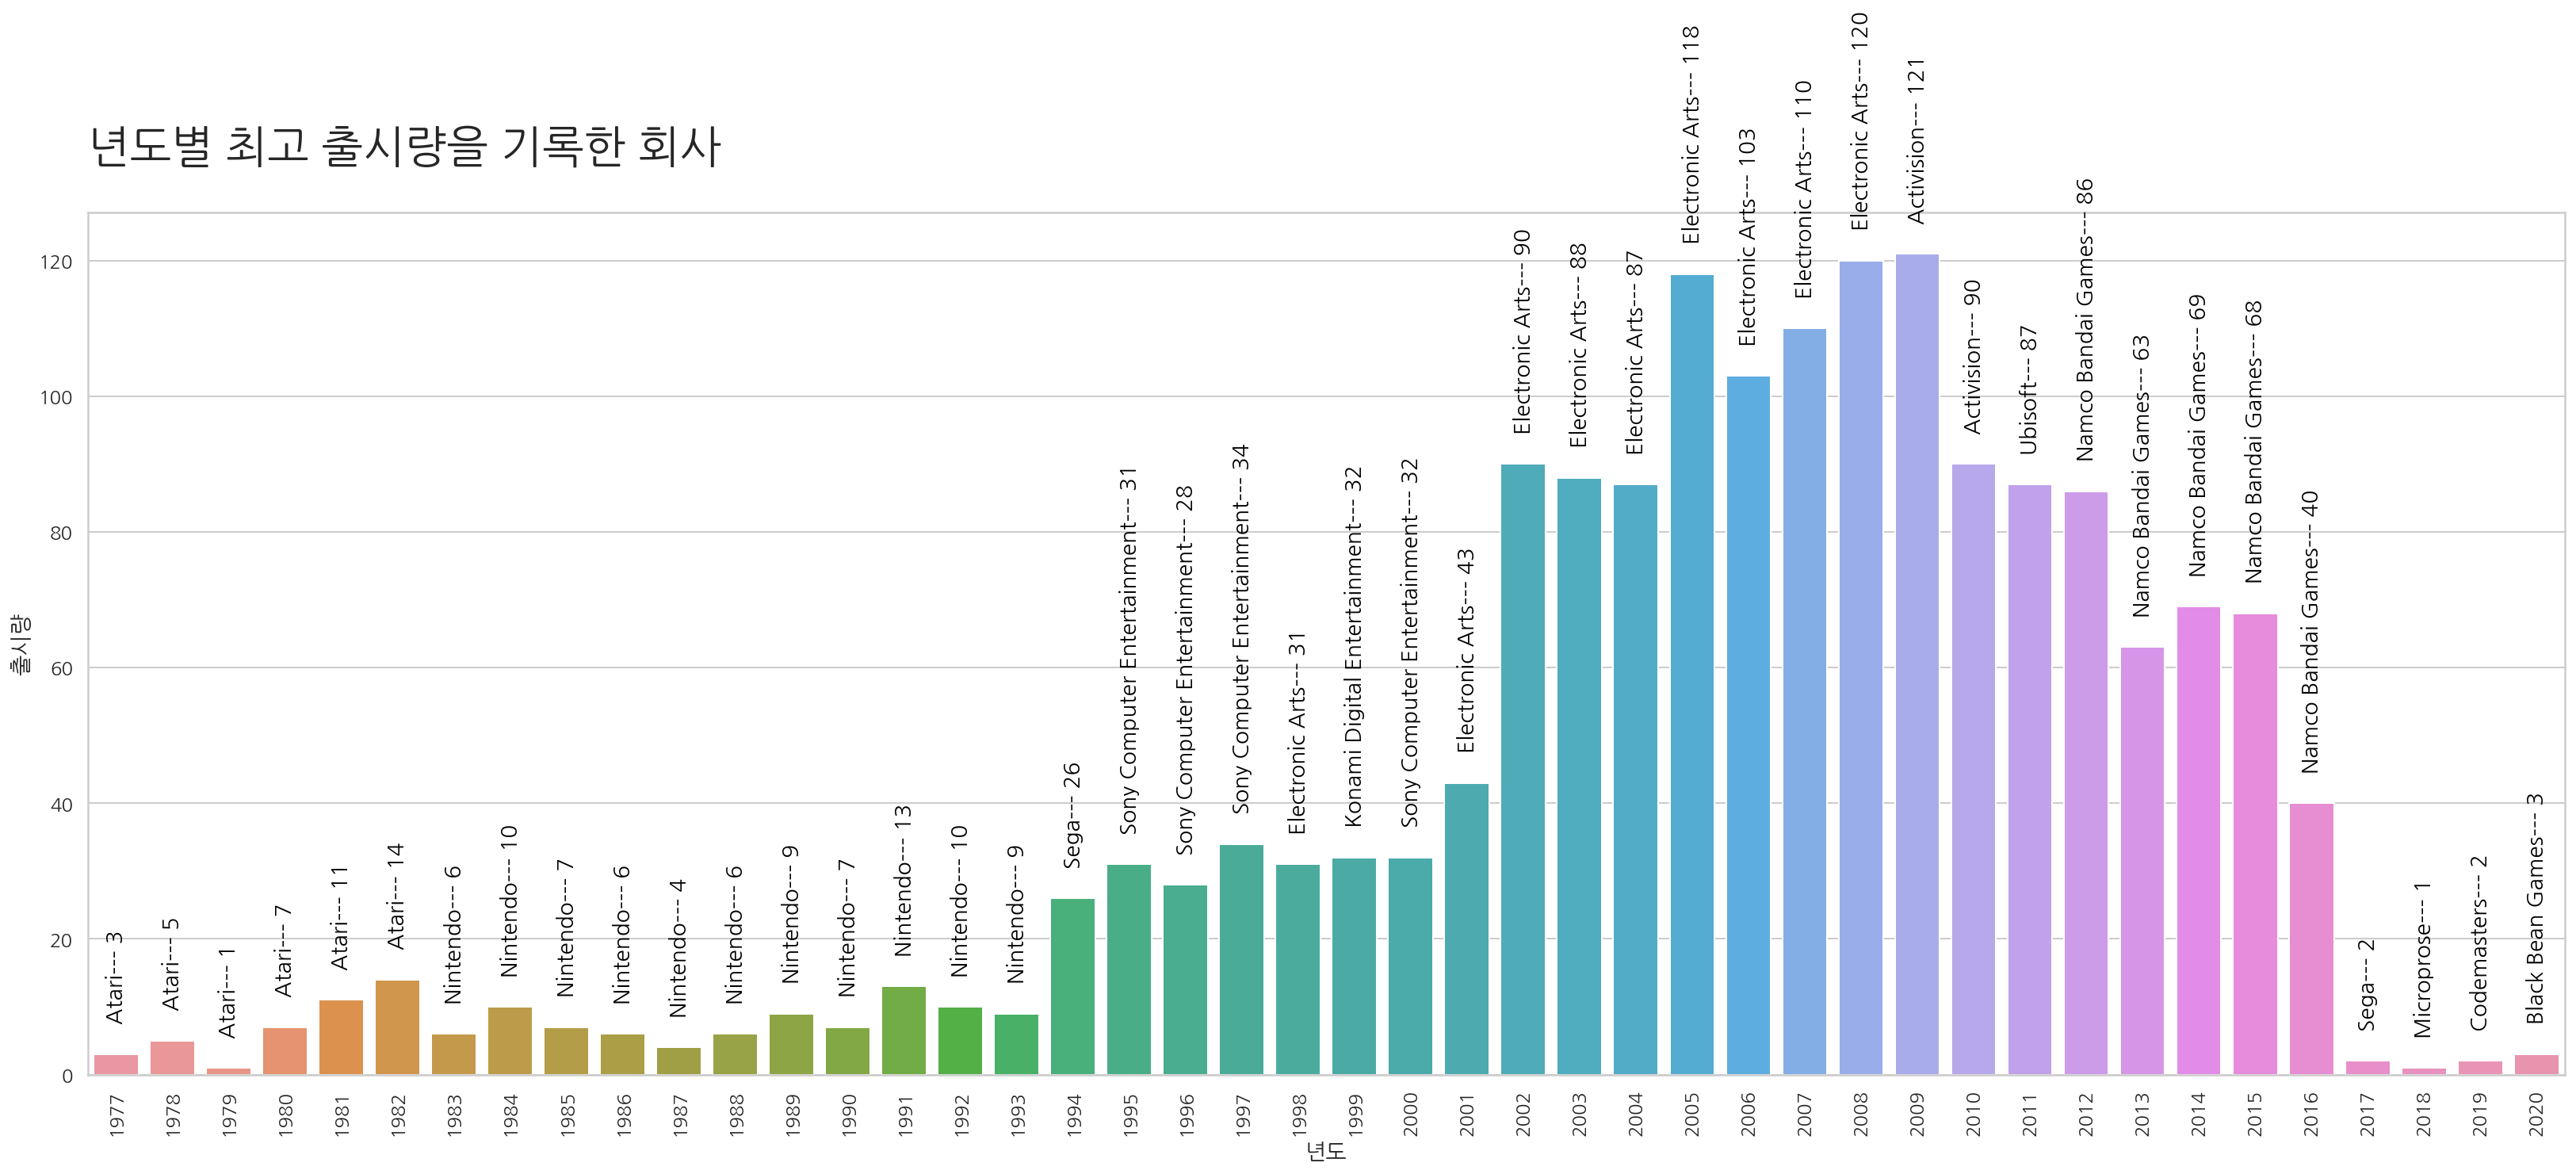

In [42]:
plt.figure(figsize=(28,10))
ax = sns.barplot(x='년도', y='출시량', data=year_max_com)
idx = 0
for value in year_max_com['출시량']:
    ax.text(x=idx, y=value + 5, s=str(publisher[idx] + '---' + ' ' + str(value)),
            color='black', size=14, rotation=90, ha='center')
    idx += 1
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('년도', fontsize=14)
plt.ylabel('출시량', fontsize=14)
ax.set_title('년도별 최고 출시량을 기록한 회사', fontsize=28, y=1.05, loc='left')
plt.show()

## 3-3. 년도별 최고 판매량을 기록한 회사

In [44]:
# 회사의 년도별 판매량 데이터 프레임 만들기
year_sales_com = df.groupby(['Year', 'Publisher'])['Global_Sales'].sum().reset_index(name='sales')
condition = year_sales_com['sales'] == year_sales_com.groupby(['Year'])['sales'].transform(max)
year_sales_com = year_sales_com[condition]

# 중복값 마지막값이외에 제외하기
year_sales_com = year_sales_com.drop_duplicates(subset=['Year','sales'], keep='last').reset_index(drop=True)

year_sales_com.columns = ['년도', '회사명', '판매량']
year_sales_com[-5:]

,년도,회사명,판매량
39,2016,Electronic Arts,12.27
40,2017,Sega,0.04
41,2018,Microprose,0.05
42,2019,Codemasters,0.09
43,2020,Black Bean Games,0.34


In [45]:
publisher = year_sales_com.회사명

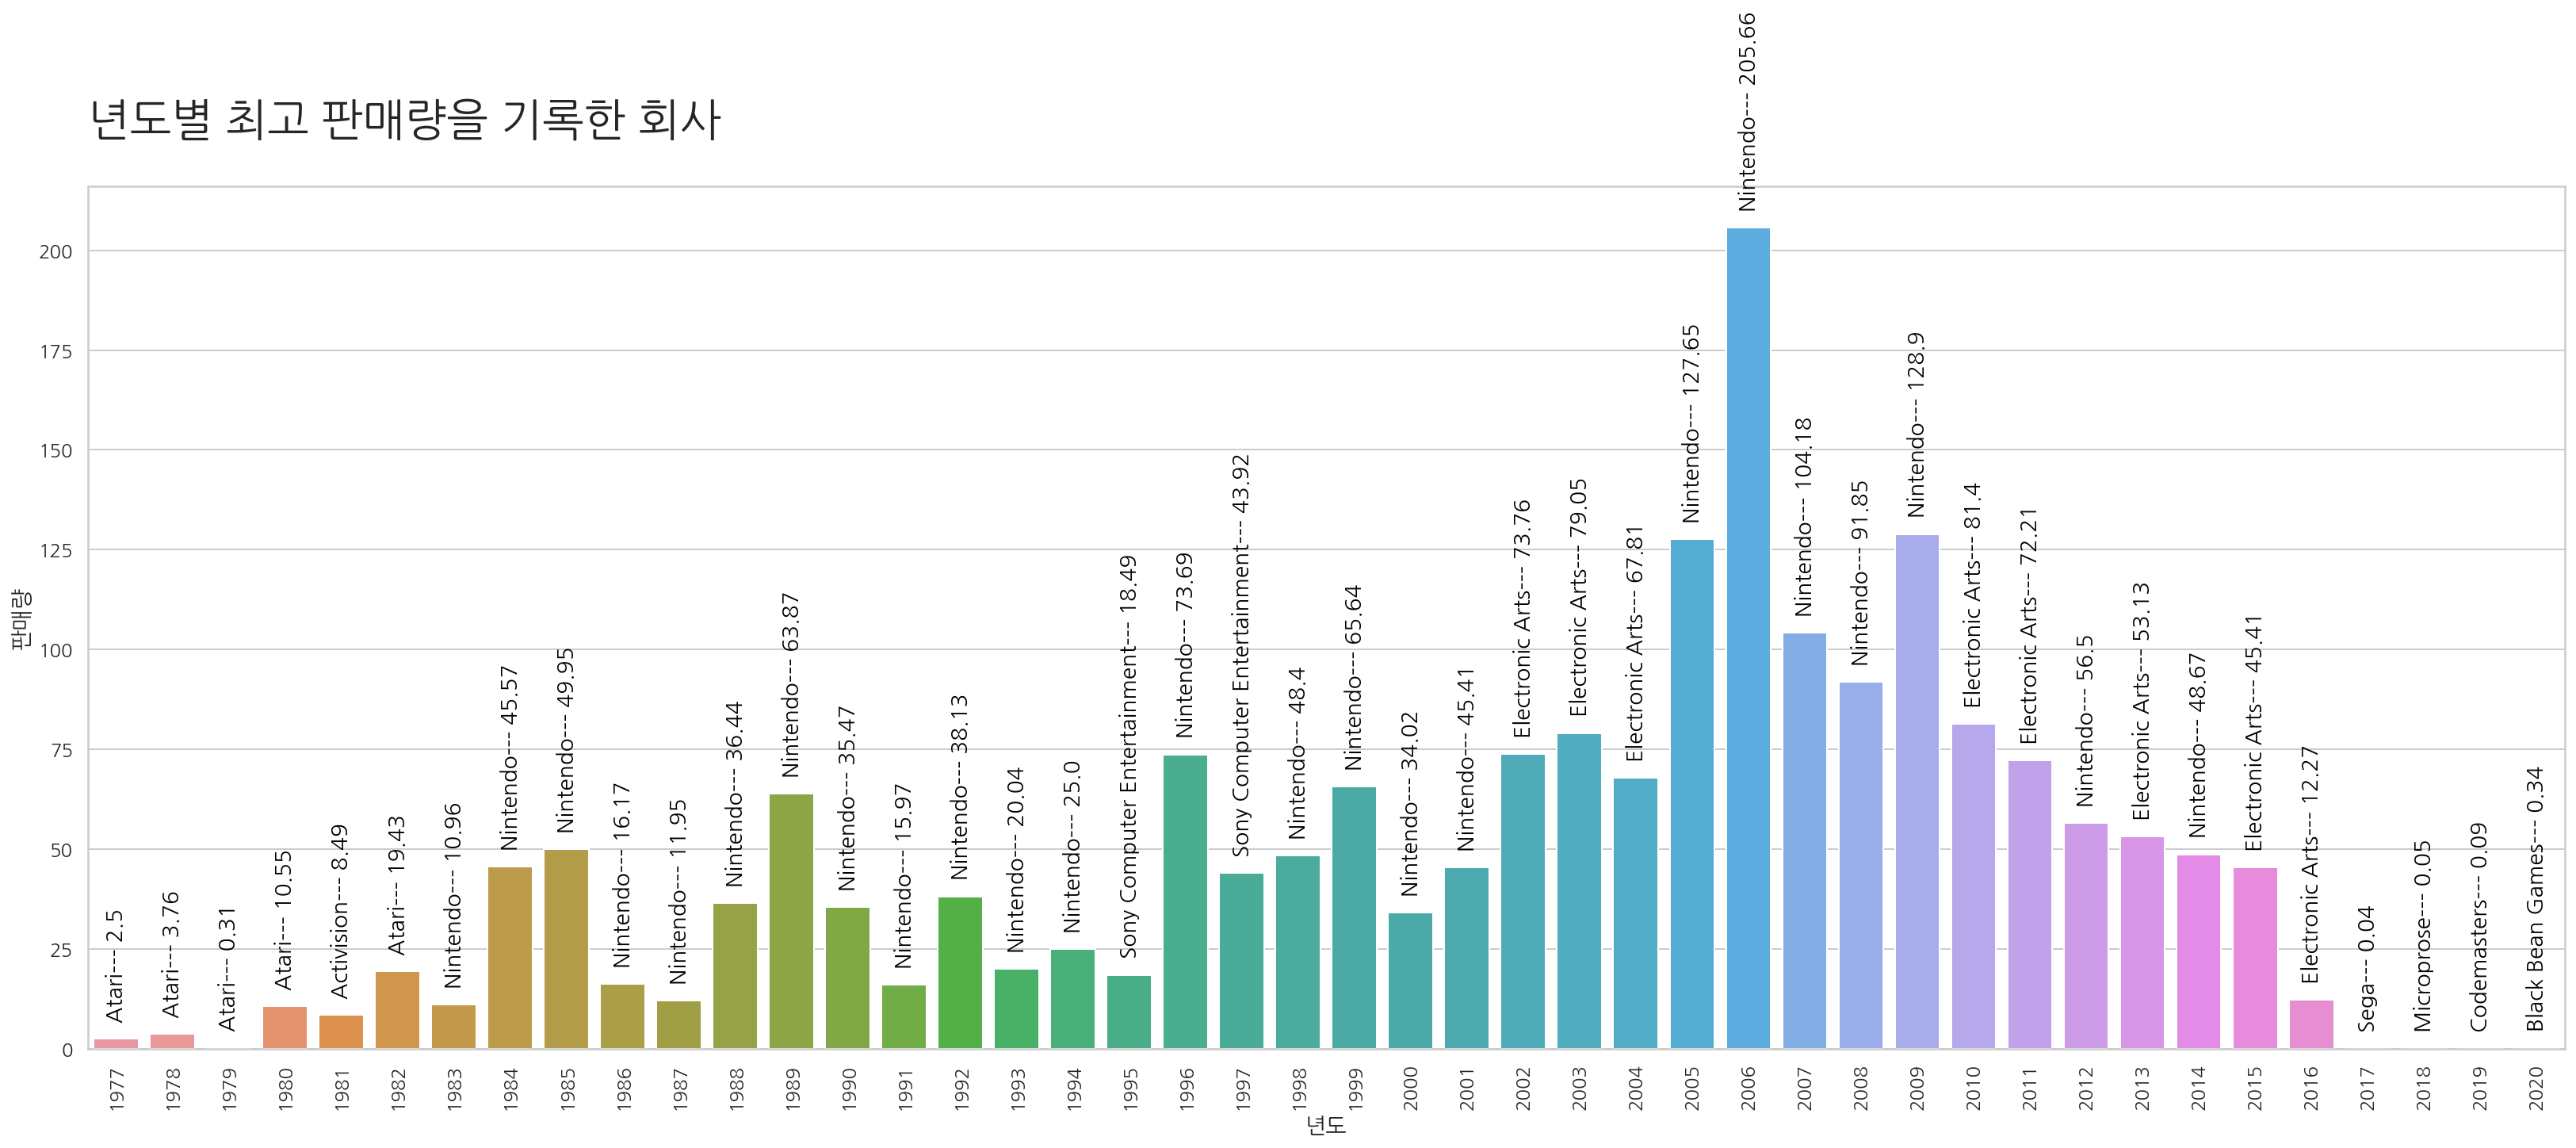

In [46]:

plt.figure(figsize=(28,10))
ax = sns.barplot(x='년도', y='판매량', data=year_sales_com)
idx = 0
for value in year_sales_com['판매량']:
    ax.text(x=idx, y=value + 5, s=str(publisher[idx] + '---' + ' ' + str(round(value, 2))),
            color='black', size=14, rotation=90, ha='center')
    idx += 1
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('년도', fontsize=14)
plt.ylabel('판매량', fontsize=14)
ax.set_title('년도별 최고 판매량을 기록한 회사', fontsize=28, y=1.05, loc='left')
plt.show()

# 4. TOP10 게임 분석

## 4-1. 역대 판매량 TOP10 게임

In [50]:
# 판매량이 높은 Top10
sales_top10 = df.loc[df.Global_Sales.sort_values(ascending=False).index].reset_index(drop=True).head(10)
rank = [str(x)+' 위' for x in range(1, 11)]
sales_top10['rank'] = rank
sales_top10

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,rank
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1 위
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,2 위
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,3 위
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,4 위
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,5 위
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,6 위
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,7 위
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01,8 위
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61,9 위
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,10 위


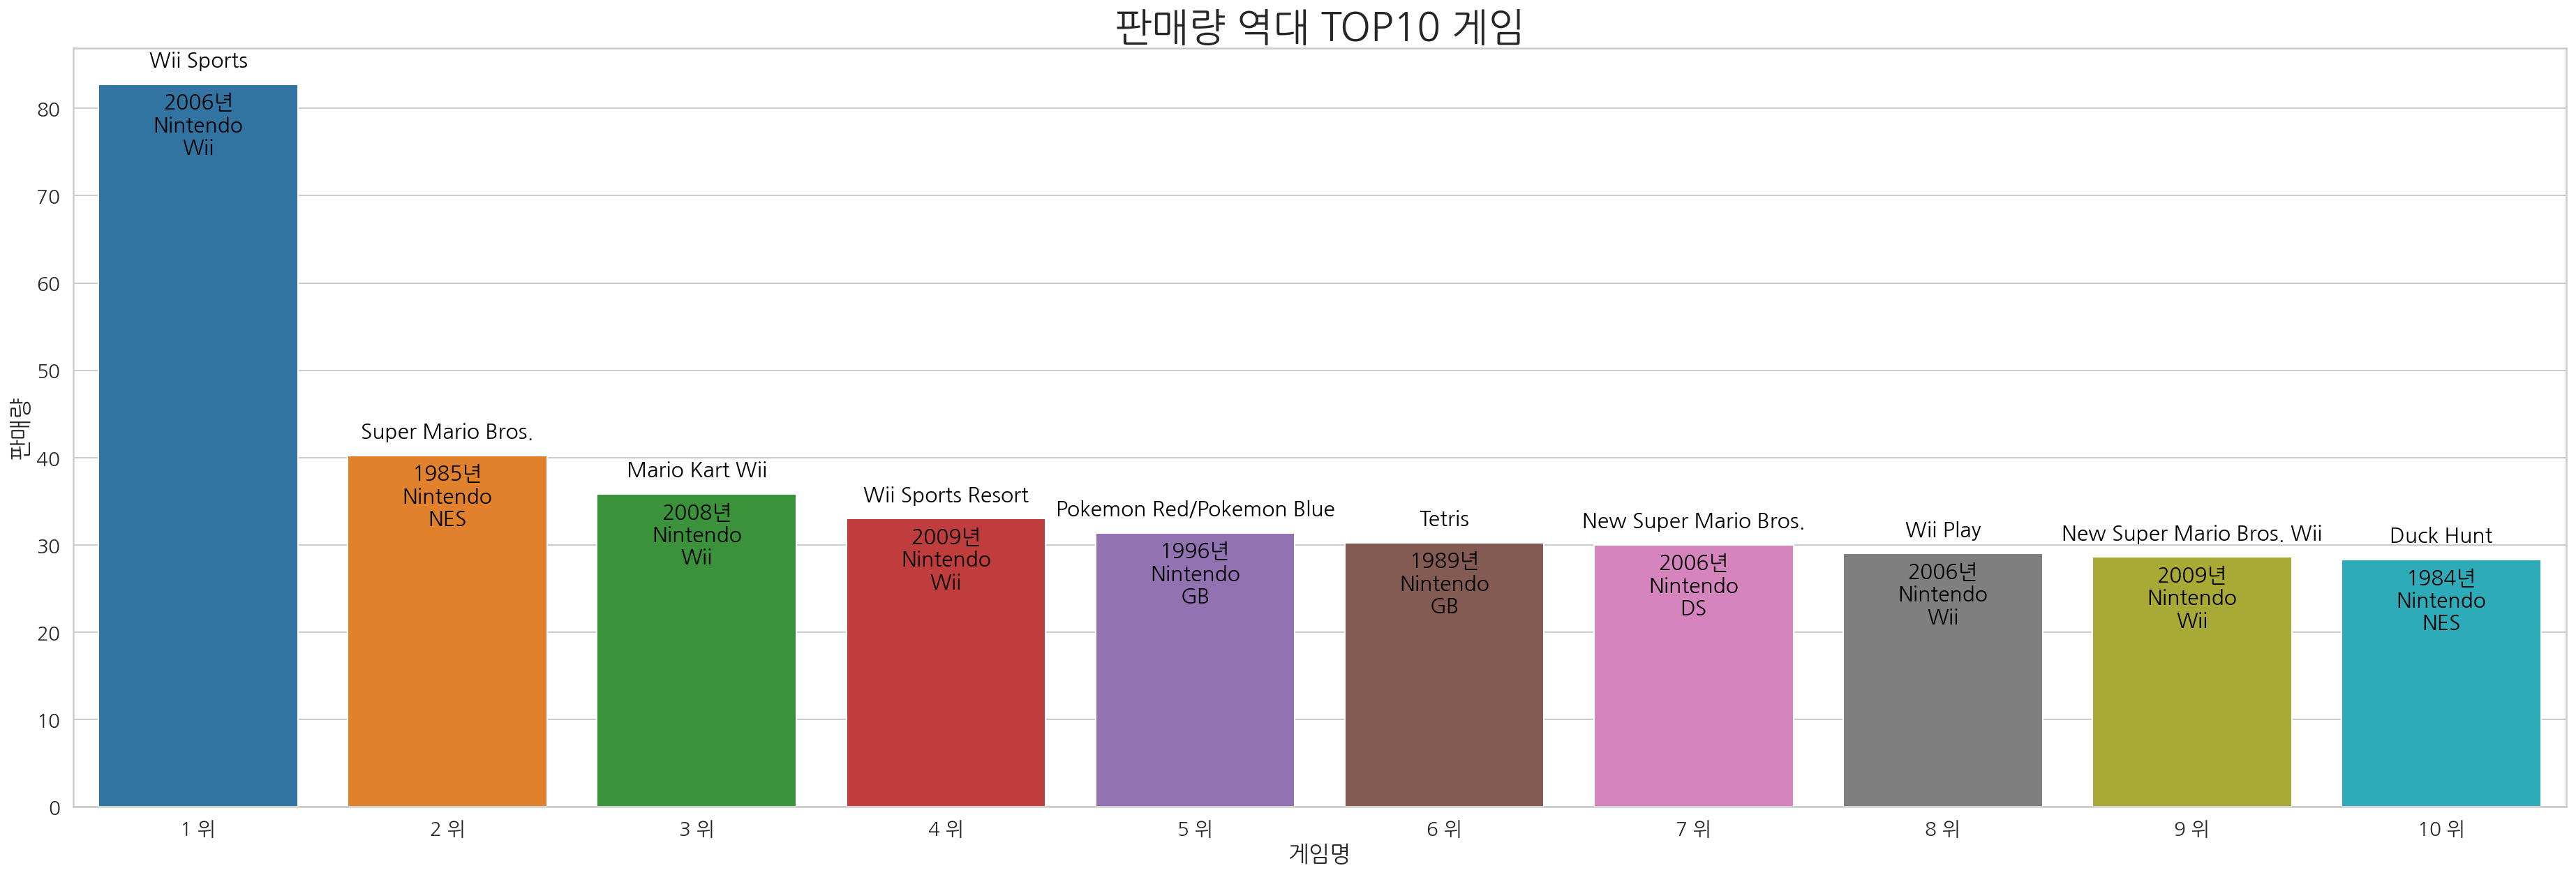

In [51]:
plt.figure(figsize=(32,10))
a = sns.barplot(x='rank', y='Global_Sales', data=sales_top10)
i = 0
for name, year, val, platform, publisher in zip(sales_top10.Name, sales_top10.Year, sales_top10.Global_Sales, 
                                                sales_top10.Platform, sales_top10.Publisher):
    a.text(x=i, y=val+2, s=(name), color='black', ha='center', fontsize=15)
    a.text(x=i, y=val-8, s=(str(year) + '년' + '\n' + publisher + '\n' + platform), color='black', ha='center', fontsize=15)
    i+=1
a.set_title('판매량 역대 TOP10 게임', fontsize=28)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('게임명', fontsize=16)
plt.ylabel('판매량', fontsize=16)
plt.show()

## 4-2. 최근 10년 판매량 TOP10 게임

In [52]:
year_sales_top_game = df[df.Year >= 2011].sort_values('Global_Sales', ascending=False).head(10)
year_sales_top_game = year_sales_top_game.reset_index(drop=True)
year_sales_top_game

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
1,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
2,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,14.35
4,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
5,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.04
6,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.30,0.07,1.12,13.74
7,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,13.47
8,Mario Kart 7,3DS,2011,Racing,Nintendo,4.74,3.91,2.67,0.89,12.21
9,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99


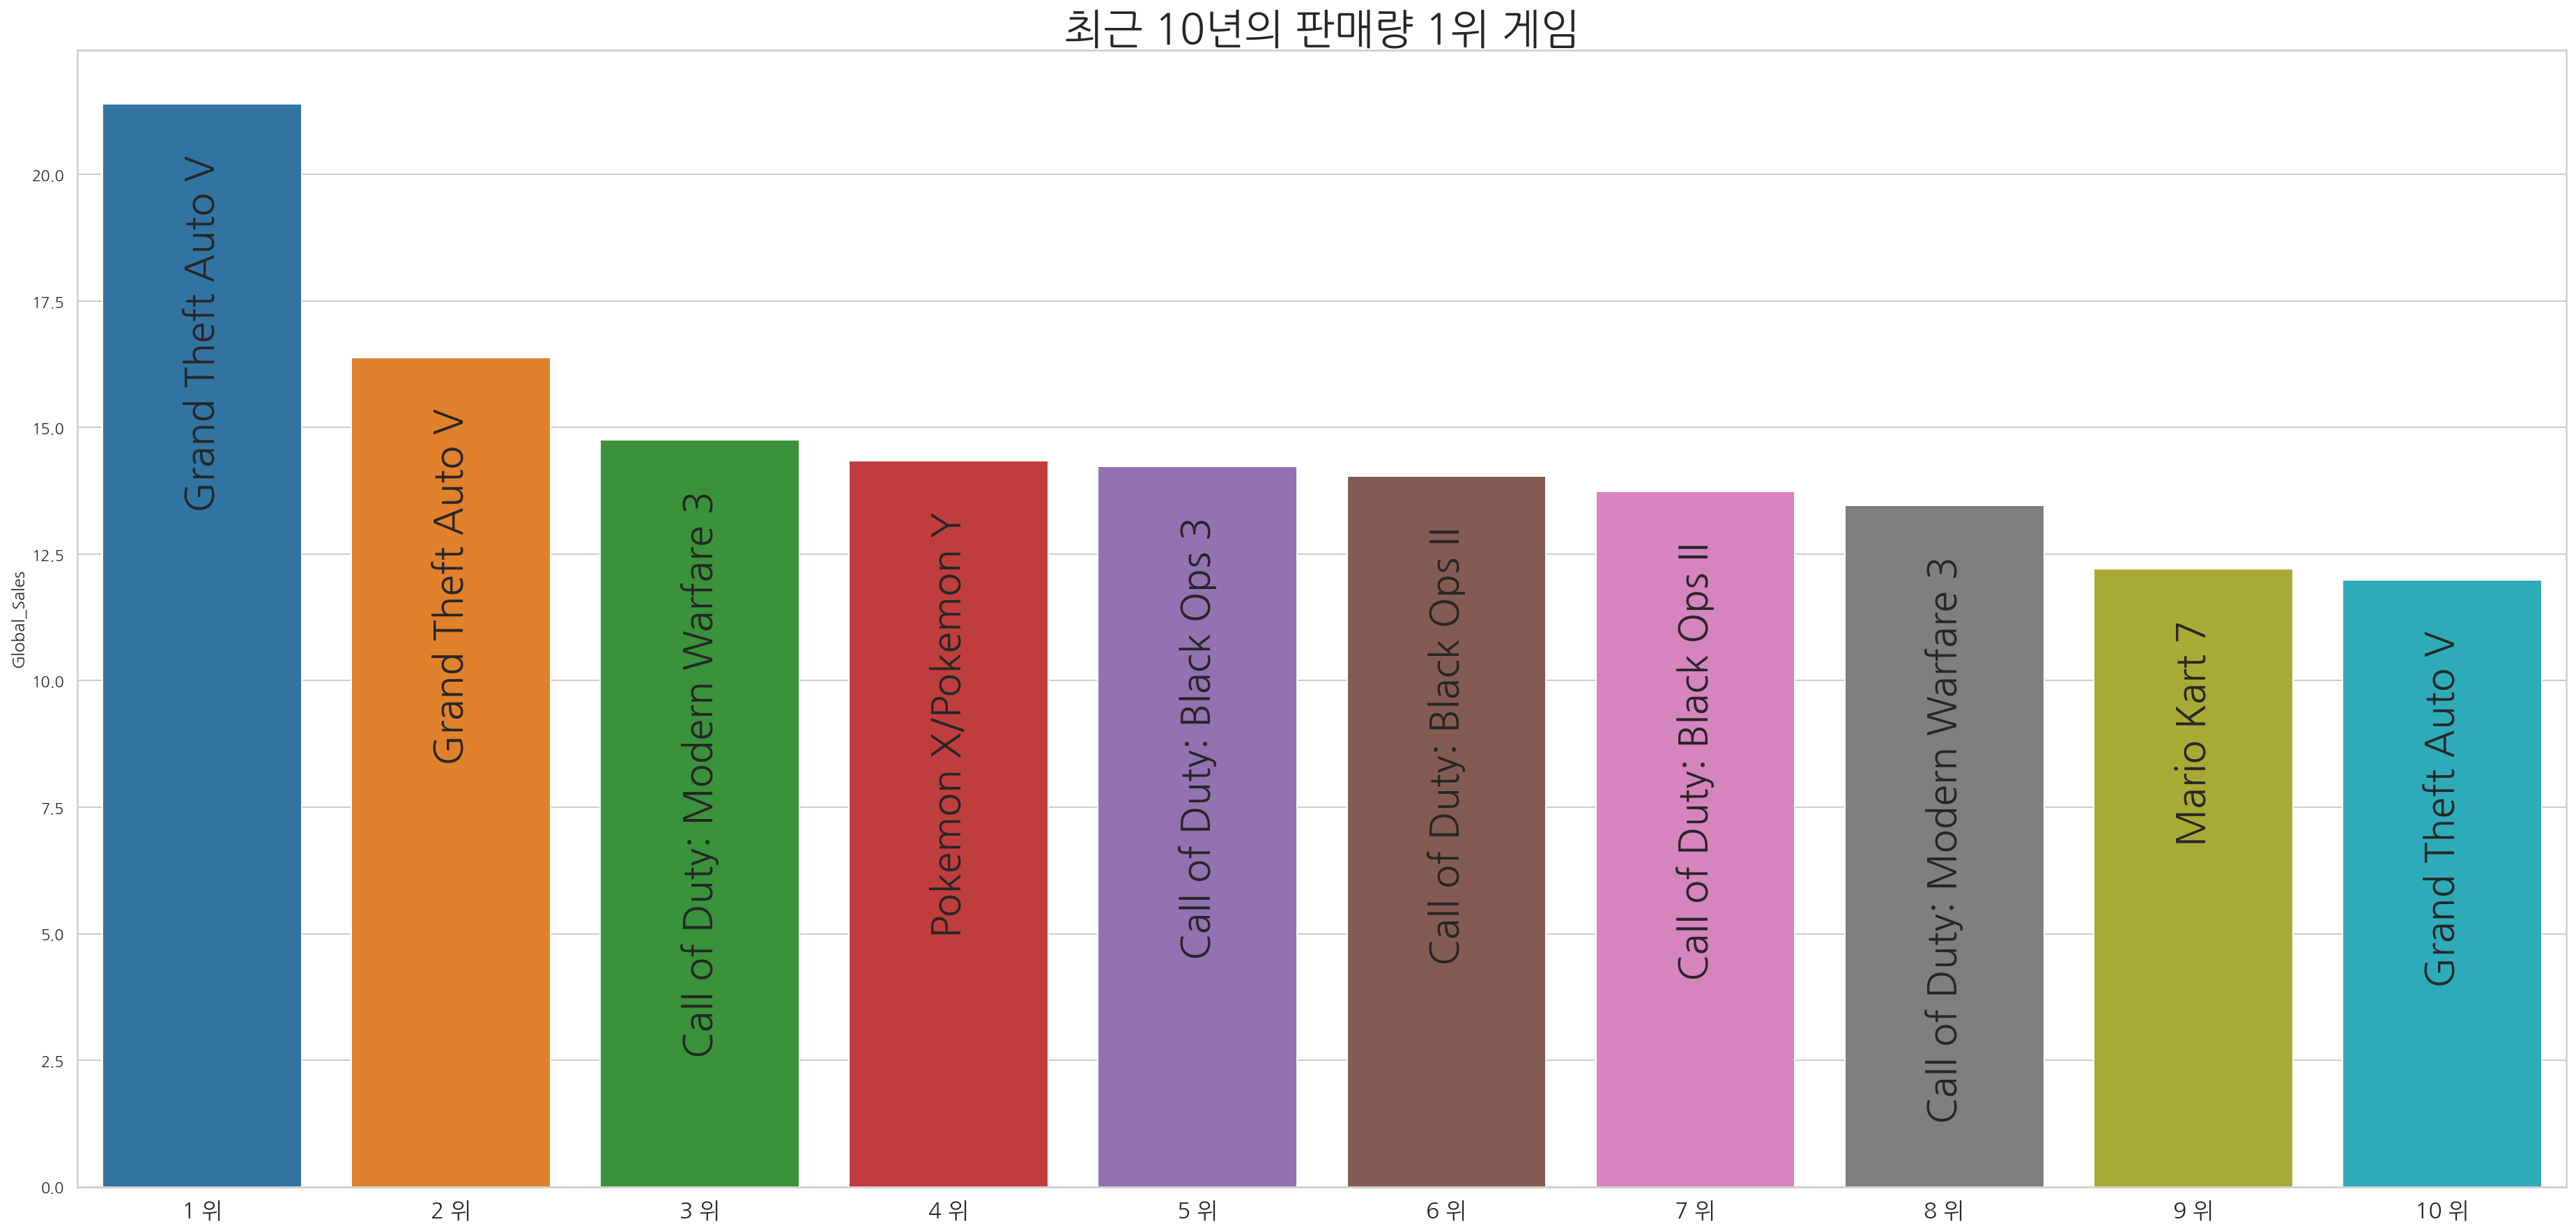

In [53]:
plt.figure(figsize=(32, 15))
a = sns.barplot(x = year_sales_top_game.index, y='Global_Sales', data=year_sales_top_game)
i = 0
for name, val in zip(year_sales_top_game.Name, year_sales_top_game.Global_Sales):
    if val >= 7:
        a.text(x=i, y=val-1, s=(name), ha='center',va='top', fontsize=28, rotation=90)
    else:
        a.text(x=i, y=val+1, s=(name), ha='center', fontsize=28, rotation=90)
    
    i+=1
a.set_title('최근 10년의 판매량 1위 게임', fontsize=30)
plt.xticks(ticks=[x for x in range(10)], labels=[str(x)+' 위' for x in range(1, 11)], fontsize=16)
plt.show()

## 4-4. 최근 10년 TOP10 게임의 플랫폼, 장르의 판매량

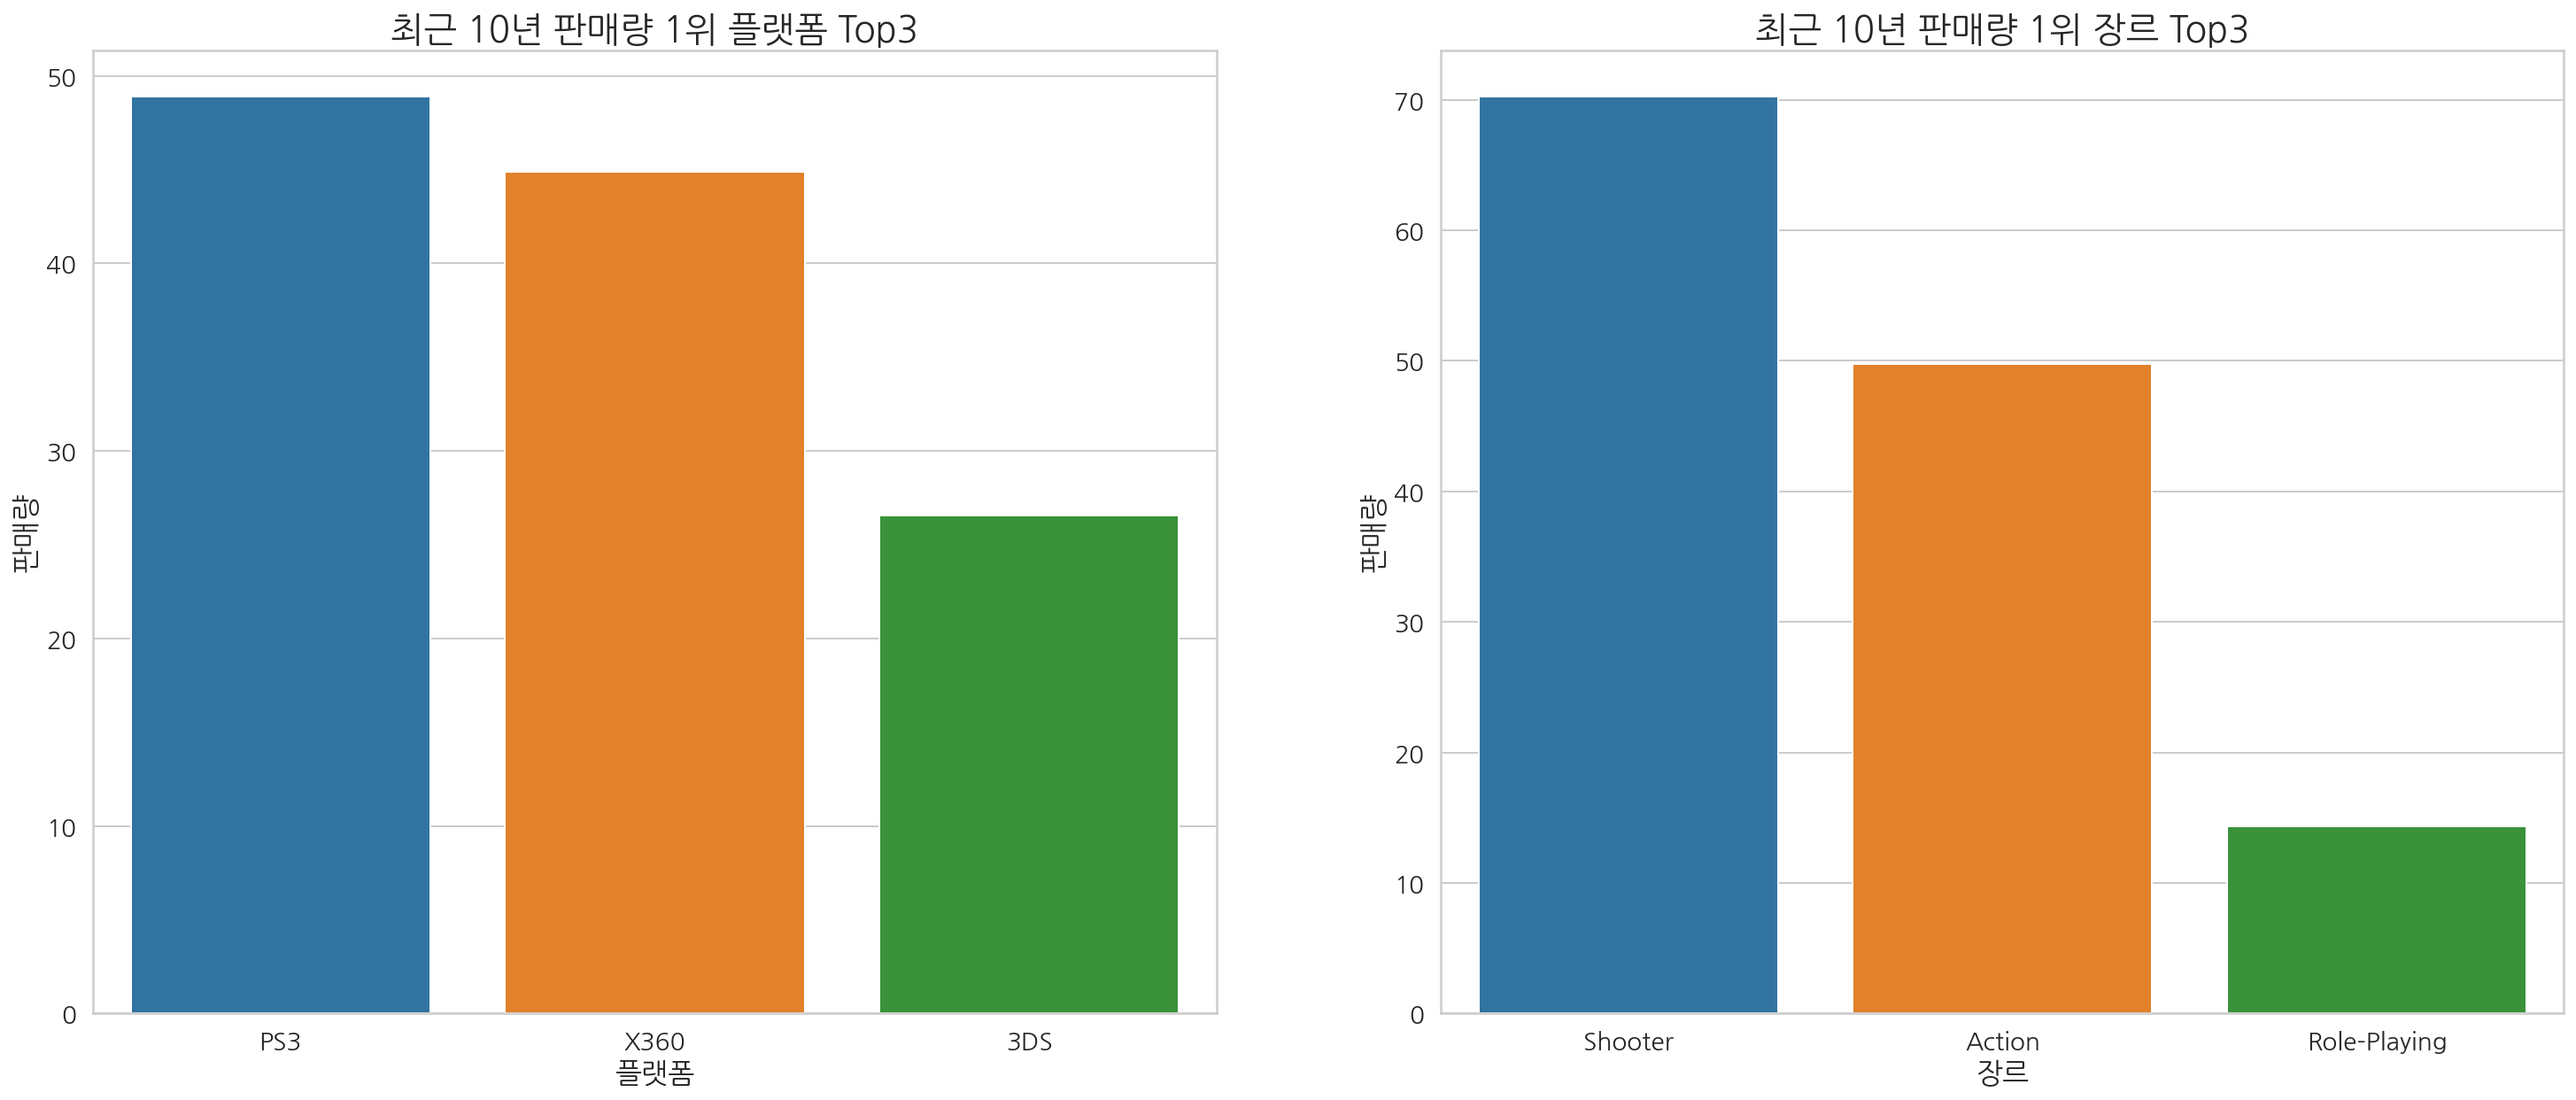

In [54]:
def recent_year_Top3_sales(df, col, sales):
    return df.groupby(col)[sales].sum().reset_index(name='sales').sort_values('sales', ascending=False).head(3)

# 최근 10년 회사 판매량 Top3
# publisher_sales_top3 = recent_year_Top3_sales(year_sales_top_game, 'Publisher', 'Global_Sales')
# 최근 10년 플랫폼 판매량 Top3
platform_sales_top3 = recent_year_Top3_sales(year_sales_top_game, 'Platform', 'Global_Sales')
# 최근 10년 장르 판매량 Top3
genre_sales_top3 = recent_year_Top3_sales(year_sales_top_game, 'Genre', 'Global_Sales')

data_list = [platform_sales_top3, genre_sales_top3]
titles = ['최근 10년 판매량 1위 플랫폼 Top3', '최근 10년 판매량 1위 장르 Top3']
x_labels = ['플랫폼', '장르']

fig, axs = plt.subplots(figsize=(25,10), nrows=1, ncols=2)
for i, data, title in zip(range(3), data_list, titles):
    sns.barplot(x=data.iloc[:,0], y=data.iloc[:,1], ax=axs[i])
    axs[i].set_title(titles[i], fontsize=20)
    axs[i].tick_params(labelsize=14)
    axs[i].set_xlabel(x_labels[i], fontsize=16)
    axs[i].set_ylabel('판매량', fontsize=16)
plt.show()

# 결론

### 플레이스테이션을 플랫폼으로 한 액션 장르의 시리즈물